In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pickle
from itertools import permutations

sns.set_theme()
sns.set(font_scale = 0.9)

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# no text wrapping
display(HTML("<style>.dataframe td { white-space: nowrap; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 200)

In [2]:
df_gns = pd.read_pickle('df_gns.pickle')
df_mar = pd.read_pickle('df_mar.pickle')
df_code = pd.read_pickle('df_code.pickle')
df_gsite = pd.read_pickle('df_gsite.pickle')
df_msite = pd.read_pickle('df_msite.pickle')

# Questions from EDA

### BIO DATA

In [3]:
# sweep number 1A and 1B in Margaree

df_mar.SWEEP_NUMBER.value_counts().loc[sorted(list(df_mar.SWEEP_NUMBER.value_counts().index), key=str)]

0        146
0.5    16974
1      12340
1A       402
1B       627
2       5528
3       3249
4       1551
5        517
6        269
7          9
Name: SWEEP_NUMBER, dtype: int64

In [4]:
# sex only M and U in GNS

df_gns.SEX.value_counts()

U    1437
M     445
Name: SEX, dtype: int64

In [5]:
# scale vs scale

print('GNS')
display(df_gns.AGE_TYPE.value_counts())
print(list(df_gns.AGE_TYPE.unique()))

print('\n\nMARGAREE')
display(df_mar.AGE_TYPE.value_counts())
print(list(df_mar.AGE_TYPE.unique()))

GNS


SCALE     916
SCALE       2
Name: AGE_TYPE, dtype: int64

[nan, 'SCALE', 'SCALE ']


MARGAREE


LGTHFREQ    10290
SCALE        1223
SCALE          35
Name: AGE_TYPE, dtype: int64

['LGTHFREQ', nan, 'SCALE', 'SCALE ']


In [6]:
# MATURITY is almost never used, and always p when it is

display(df_gns.MATURITY.value_counts())
print(df_gns.shape[0])
display(df_mar.MATURITY.value_counts())
print(df_mar.shape[0])

P    23
Name: MATURITY, dtype: int64

12895


P    36
Name: MATURITY, dtype: int64

44472


In [7]:
# River Age

display(df_gns.RIVER_AGE.value_counts())
display(df_mar.RIVER_AGE.value_counts().sort_index())

0.0    4949
1.0    1556
2.0     462
Name: RIVER_AGE, dtype: int64

0.0    13769
1.0    16285
2.0     5620
3.0      138
4.0        1
Name: RIVER_AGE, dtype: int64

In [8]:
# overlapping fish sizes (3 fry sizes)

df_mar.FISH_SIZE.value_counts().sort_index()

FRY       13817
FRY          27
LGPARR     6026
PARR       1799
SMPARR    15049
fry           1
Name: FISH_SIZE, dtype: int64

### CODE DATA

In [9]:
for col in df_code.columns:
    print()
    print(col)
    if df_code[col].nunique()>5:
        display(df_code[col].value_counts().head())
    else:
        display(df_code[col].value_counts())


VIEW_NAME


VU_SEMIR_RIVER               272
VU_SEMIR_SITE                272
VU_SEMIR_BIOLOGICAL          110
VU_SEMIR_SPECIES              53
VU_SEMIR_SITE_MEASUREMENT     35
Name: VIEW_NAME, dtype: int64


ALIAS_NAME


River                    272
Site Data                272
Fish Data                110
Species                   53
Site Measurement Data     35
Name: ALIAS_NAME, dtype: int64


FIELDNAME


MARITIME_RIVER_CODE        396
OLD_MARITIME_RIVER_CODE    138
SPECIES_LIFE_STAGE          79
AIKENHEAD_LEGROW_CODE       53
ELECTROFISHER_TYPE          17
Name: FIELDNAME, dtype: int64


CODE_VALUE


2          6
1          6
847004     4
1113088    4
1102000    4
Name: CODE_VALUE, dtype: int64


LABEL


1113001 - Black Brook         4
1113068 - SUTHERLAND BROOK    4
1103000 - Eel River           4
1102000 - Portage River       4
1115000 - OYSTER RIVER        4
Name: LABEL, dtype: int64


DESCRIPTION


1113016 - Black Brook          4
1113005 - Barnaby River        4
1113007 - Grey Rapids Brook    4
1113008 - Becket Brook         4
1113013 - McKenzie Brook       4
Name: DESCRIPTION, dtype: int64

### SITE DATA

In [10]:
# very many null columns
df_gsite.columns[df_gsite.isna().all()]

Index(['DEPTHA4', 'DEPTHB4', 'DEPTHC4', 'DEPTH_LAYOUT_TYPE', 'AIR_TEMPERATURE',
       'WATER_TEMPERATURE_DEPART', 'TIME_TEMP1', 'WATER_TEMP1', 'TIME_TEMP2',
       'WATER_TEMP2', 'TIME_TEMP3', 'WATER_TEMP3', 'GRADIENT_WATER_HEIGH_UP',
       'GRADIENT_WATER_HEIGH_DOWN', 'GRADIENT_DISTANCE', 'WATER_VEL_TIME',
       'WATER_VEL_DISTANCE', 'WATER_CONDUCTIVITY_RESOLUTION', 'SWEEP0_TIME',
       'SWEEP0_TEMP', 'SWEEP1_TIME', 'SWEEP1_TEMP', 'SWEEP2_TIME',
       'SWEEP2_TEMP', 'SWEEP3_TIME', 'SWEEP3_TEMP', 'SWEEP4_TIME',
       'SWEEP4_TEMP', 'SWEEP5_TIME', 'SWEEP5_TEMP', 'SWEEP6_TIME',
       'SWEEP6_TEMP', 'BARRIER_PRESENT', 'MESH_SIZE', 'BARRIER_COUNT',
       'APRONSEINE', 'APRONSEINE_TYPE', 'SWEEP_COUNT', 'DEPTH_COUNT',
       'WETTED_AREA', 'UNWETTED_AREA', 'CREW_BUCKET', 'CREW_RECORDER',
       'CREW_OTHER1', 'CREW_OTHER2', 'CREW_OTHER3', 'CREW_OTHER4',
       'CREW_OTHER5'],
      dtype='object')

In [11]:
df_msite.columns[df_msite.isna().all()]

Index(['DEPTHA4', 'DEPTHB4', 'DEPTHC4', 'DEPTH_LAYOUT_TYPE', 'TIME_TEMP2',
       'WATER_TEMP2', 'TIME_TEMP3', 'WATER_TEMP3', 'GRADIENT_WATER_HEIGH_UP',
       'GRADIENT_WATER_HEIGH_DOWN', 'GRADIENT_DISTANCE', 'WATER_VEL_TIME',
       'WATER_VEL_DISTANCE', 'SWEEP0_TIME', 'SWEEP0_TEMP', 'BARRIER_PRESENT',
       'MESH_SIZE', 'APRONSEINE', 'APRONSEINE_TYPE', 'SWEEP_COUNT',
       'DEPTH_COUNT', 'WETTED_AREA', 'UNWETTED_AREA', 'CREW_RECORDER',
       'CREW_OTHER2', 'CREW_OTHER3', 'CREW_OTHER4', 'CREW_OTHER5'],
      dtype='object')

In [12]:
# ELECTROFISHER_TYPE labels
df_msite.ELECTROFISHER_TYPE.value_counts()

LR24     89
LR 24    20
Name: ELECTROFISHER_TYPE, dtype: int64

In [13]:
# huge currents sometimes
print('MARGAREE')
display(df_msite.ELECTROFISHER_CURRENT.value_counts().sort_index(ascending=False).head())
print()
print('GNS')
display(df_gsite.ELECTROFISHER_CURRENT.value_counts().sort_index(ascending=False).head())

MARGAREE


250.0    1
46.2     1
3.5      1
2.6      1
1.9      1
Name: ELECTROFISHER_CURRENT, dtype: int64


GNS


0.5    1
0.4    2
0.4    1
0.3    1
0.3    1
Name: ELECTROFISHER_CURRENT, dtype: int64

In [14]:
# so many rocks
[x for x in df_gsite.columns.sort_values() if 'SUB_' in x]

['SUB_TYPE_BEDROCK',
 'SUB_TYPE_BOULDER',
 'SUB_TYPE_COBBLE',
 'SUB_TYPE_FINES',
 'SUB_TYPE_GRAVEL',
 'SUB_TYPE_PEBBLE',
 'SUB_TYPE_ROCKS',
 'SUB_TYPE_SAND']

In [15]:
# one outlier LENGTH_RIGHT_BANK
df_gsite.LENGTH_RIGHT_BANK.value_counts().sort_index(ascending=False)

194.0    1
36.6     1
31.1     1
29.7     1
28.8     1
        ..
6.0      2
5.0      1
4.2      1
4.0      1
3.4      1
Name: LENGTH_RIGHT_BANK, Length: 130, dtype: int64

In [16]:
# that can't be right...
df_msite.WATER_PH.value_counts().sort_index(ascending=False).head()

11.9    1
8.6     1
8.4     1
8.2     2
8.1     1
Name: WATER_PH, dtype: int64

In [17]:
# weather notes don't seem to follow any format
display(df_msite.WEATHER.value_counts())
display(df_gsite.WEATHER.value_counts())

sun                  51
overcast             14
Sunny                10
cloud                 6
rain                  6
sun/cloud             5
cloud/sun             4
overcast/sun          4
Overcast              3
showers               2
cloud/showers         1
fog/sun               1
cloud/rain            1
sun/showers           1
Sunny & hot           1
cloud                 1
Cloudy with Sunny     1
Name: WEATHER, dtype: int64

overcast, warm            1
sun, clouds               1
overcast, sunny breaks    1
Name: WEATHER, dtype: int64

# Flag Outliers

In [18]:
def create_stats(dataframe, drop_columns=list()):
    stats_dataframe = dataframe.loc[:, (dataframe.dtypes == 'int64') | (dataframe.dtypes == 'float64')].drop(drop_columns, axis=1).describe(percentiles=[.005, .25, .75, .995]).T
    stats_dataframe['IQR'] = stats_dataframe['75%'] - stats_dataframe['25%']
    stats_dataframe = stats_dataframe.rename({'mean':'avg', '0.5%':'stdev_n3', '50%':'median', '99.5%':'stdev_3'}, axis=1)[['avg', 'median', 'std', 'IQR', 'stdev_n3', 'stdev_3']]
    return stats_dataframe

def flag_outliers(dataframe, stats_dataframe):
    for feature, values in stats_dataframe.iterrows():
        if stats_dataframe.loc[feature].IQR != 0:
            dataframe.loc[dataframe[feature] < stats_dataframe.loc[feature].avg - stats_dataframe.loc[feature].IQR*1.5, ['outlier', f'outlier_{feature}']] = True, 'low'
            dataframe.loc[dataframe[feature] > stats_dataframe.loc[feature].avg + stats_dataframe.loc[feature].IQR*1.5, ['outlier', f'outlier_{feature}']] = True, 'high'
        dataframe.loc[dataframe[feature] < stats_dataframe.loc[feature].stdev_n3, ['outlier', f'outlier_{feature}']] = True, 'low'
        dataframe.loc[dataframe[feature] > stats_dataframe.loc[feature].stdev_3, ['outlier', f'outlier_{feature}']] = True, 'high'
        if dataframe[f'outlier_{feature}'].notnull().sum() == 0:
            dataframe = dataframe.drop(f'outlier_{feature}', axis=1)
    return dataframe

def print_outlier_info(dataframe):
    for col in [x for x in dataframe.columns if 'outlier_' in x]:
        feature = col.replace('outlier_', '')
        temp = dataframe.groupby(f'outlier_{feature}', dropna=False)[[feature]].agg(['mean', 'min', 'max', 'count'])
        temp.index = temp.index.fillna('normal')
        display(temp)
        print()

### GNS BIO DATA

In [19]:
df_gns_stats =  create_stats(df_gns, ['TOTAL_LENGTH', 'ID', 'YEAR'])
df_gns = flag_outliers(df_gns, df_gns_stats)
df_gns_stats

,avg,median,std,IQR,stdev_n3,stdev_3
SWEEP_NUMBER,0.5,0.5,0.0,0.0,0.5,0.5
FORK_LENGTH,66.2,59.0,21.4,22.0,33.0,143.1
WEIGHT,4.3,2.2,6.1,3.0,0.4,31.9
CATCH_FREQUENCY,1.2,1.0,3.3,0.0,1.0,1.0
RIVER_AGE,0.4,0.0,0.6,1.0,0.0,2.0
WT_BIN,3.8,2.0,5.8,3.0,0.0,31.0


In [20]:
print_outlier_info(df_gns)
# questions
## do weight and length outliers overlap? check weight/length ratio outliers = more useful

FORK_LENGTH                   
                           mean   min   max  count
outlier_FORK_LENGTH                               
high                      115.5 100.0 552.0   1098
low                        29.5  13.5  33.0     75
normal                     61.8  34.0  99.0  11603

WEIGHT                 
                 mean min   max  count
outlier_WEIGHT                        
high             15.2 8.7 161.8   1633
low               0.3 0.1   0.4     61
normal            2.7 0.4   8.7  10956

CATCH_FREQUENCY                
                                   mean min  max  count
outlier_CATCH_FREQUENCY                                
high                               32.6   2  163     64
normal                              1.0   1    1  12831

RIVER_AGE              
                       mean min max count
outlier_RIVER_AGE                        
high                    2.0 2.0 2.0   462
normal                  0.2 0.0 1.0  6505

WT_BIN                 
                 mean min   max  count
outlier_WT_BIN                        
high             15.0 9.0 100.0   1549
normal            2.2 0.0   8.0  11101

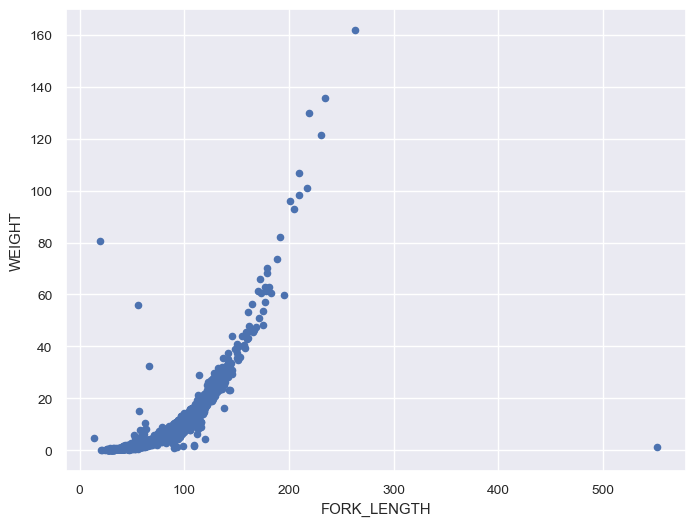

In [39]:
# first plot including outliers
df_gns.plot(kind='scatter', x='FORK_LENGTH', y='WEIGHT', figsize=(8,6));

In [41]:
# fork_length outlier is a data error
df_gns[df_gns.FORK_LENGTH>500][['WEIGHT', 'FORK_LENGTH']]

,WEIGHT,FORK_LENGTH
3802,1.4,552.0


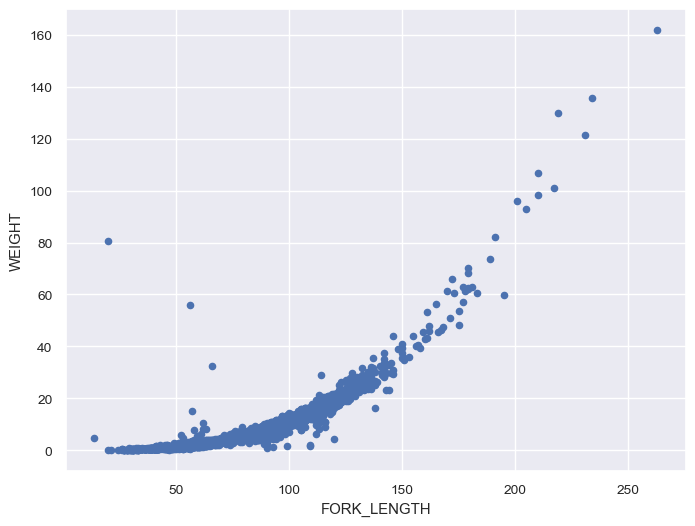

In [42]:
# still a few data errors
df_gns[df_gns.FORK_LENGTH<500].plot(kind='scatter', x='FORK_LENGTH', y='WEIGHT', figsize=(8,6));

### MARGAREE BIO DATA

In [21]:
df_mar_stats =  create_stats(df_mar, ['ID', 'YEAR', 'SPECIES_ITIS_CODE'])
df_mar = flag_outliers(df_mar, df_mar_stats)
df_mar_stats

,avg,median,std,IQR,stdev_n3,stdev_3
TOTAL_LENGTH,76.5,82.0,43.5,57.0,1.0,187.0
WEIGHT,6.6,4.0,73.8,6.8,0.3,33.5
CATCH_FREQUENCY,2.9,1.0,11.7,0.0,1.0,73.0
RIVER_AGE,0.8,1.0,0.7,1.0,0.0,2.0
WT_BIN,5.7,4.0,6.5,7.0,0.0,33.0


In [22]:
print_outlier_info(df_mar)
# questions
## length width outliers? (as above)

TOTAL_LENGTH                  
                             mean   min   max count
outlier_TOTAL_LENGTH                               
high                        185.8 162.0 318.0    92
normal                       74.7   1.0 161.0  5730

WEIGHT                    
                 mean  min     max  count
outlier_WEIGHT                           
high             31.7 16.8 11600.0   1478
low               0.2  0.1     0.3    113
normal            5.0  0.3    16.8  23251

CATCH_FREQUENCY                  
                                   mean  min   max  count
outlier_CATCH_FREQUENCY                                  
high                              128.2 74.0 581.0    220
normal                              2.2  1.0  73.0  44245

RIVER_AGE               
                       mean min max  count
outlier_RIVER_AGE                         
high                    3.0 3.0 4.0    139
normal                  0.8 0.0 2.0  35674

WT_BIN                  
                 mean  min   max  count
outlier_WT_BIN                         
high             23.5 17.0 100.0   1440
normal            4.6  0.0  16.0  23402

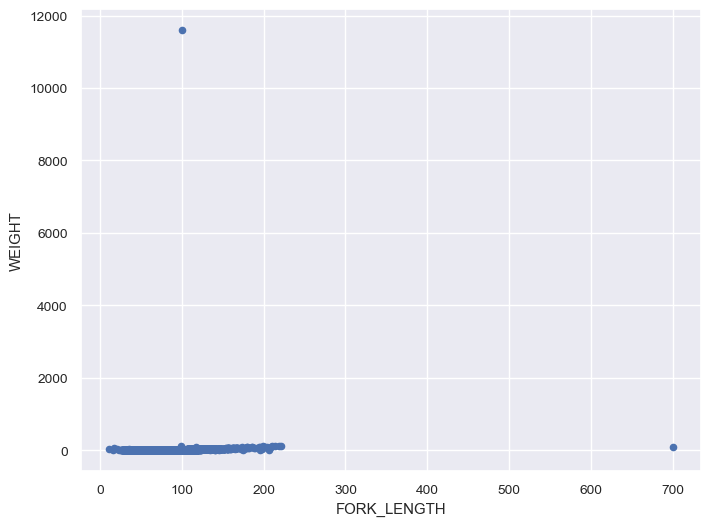

In [34]:
# first plot including outliers
df_mar.plot(kind='scatter', x='FORK_LENGTH', y='WEIGHT', figsize=(8,6));

In [35]:
# weight data error
df_mar[df_mar.WEIGHT>10000][['WEIGHT', 'FORK_LENGTH']]

,WEIGHT,FORK_LENGTH
12689,11600.0,100


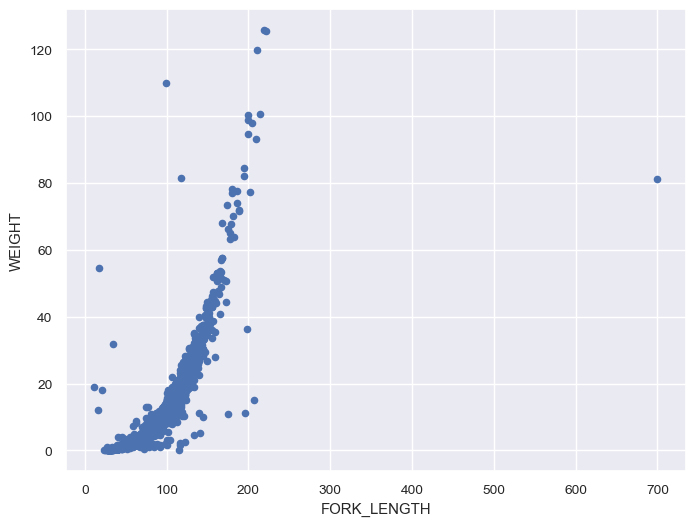

In [36]:
# is the length outlier also an error? (yes)
df_mar[df_mar.WEIGHT<1000].plot(kind='scatter', x='FORK_LENGTH', y='WEIGHT', figsize=(8,6));

In [37]:
# fork length data error
df_mar[df_mar.FORK_LENGTH>600][['WEIGHT', 'FORK_LENGTH']]

,WEIGHT,FORK_LENGTH
41228,81.2,700


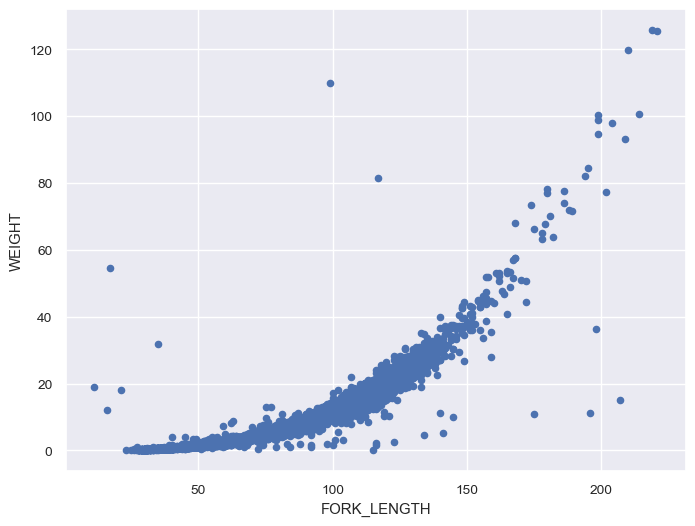

In [38]:
# check the plot excluding both obvious data errors
df_mar[(df_mar.WEIGHT<1000)&(df_mar.FORK_LENGTH<500)].plot(kind='scatter', x='FORK_LENGTH', y='WEIGHT', figsize=(8,6));

# some of these still look like data errors

### CODES

In [23]:
# no numerical data to check for outliers
df_code.dtypes

VIEW_NAME      object
ALIAS_NAME     object
FIELDNAME      object
CODE_VALUE     object
LABEL          object
DESCRIPTION    object
dtype: object

In [43]:
# let's check the least common entries, look for typos (none obvious)
## probably some cleanup possible, but nothing obvious
for col in df_code.columns:
    print()
    print(col)
    if df_code[col].nunique()>5:
        display(df_code[col].value_counts().tail())
    else:
        display(df_code[col].value_counts())


VIEW_NAME


VU_SEMIR_RIVER               272
VU_SEMIR_SITE                272
VU_SEMIR_BIOLOGICAL          110
VU_SEMIR_SPECIES              53
VU_SEMIR_SITE_MEASUREMENT     35
Name: VIEW_NAME, dtype: int64


ALIAS_NAME


River                    272
Site Data                272
Fish Data                110
Species                   53
Site Measurement Data     35
Name: ALIAS_NAME, dtype: int64


FIELDNAME


ORIGIN               3
DEPTH_LAYOUT_TYPE    3
FILE_TYPE            2
AGE_TYPE             2
APRONSEINE_TYPE      2
Name: FIELDNAME, dtype: int64


CODE_VALUE


8250    1
8260    1
8870    1
8940    1
907     1
Name: CODE_VALUE, dtype: int64


LABEL


unknown vertebrates           1
Salamanders                   1
Appalachian brook crayfish    1
Adipose clip or hatchery      1
FLOUNDER,WINDOWPANE           1
Name: LABEL, dtype: int64


DESCRIPTION


winter flounder                                                            1
windowpane flounderLeft-eyed flounder                                      1
unknown vertebratesNot ID'ed in field                                      1
Salamanders. Common in smaller tributaries. Life Stage Code = ITIS code    1
SCOPHTHALMUS (LOPHOPSETTA) AQUOSUS                                         1
Name: DESCRIPTION, dtype: int64

### GNS SITES

In [24]:
df_gsite_stats = create_stats(df_gsite, ['ID'])
df_gsite_stats = df_gsite_stats.dropna()
df_gsite = flag_outliers(df_gsite, df_gsite_stats)

In [25]:
print_outlier_info(df_gsite)

TOS3                
             mean  min  max count
outlier_TOS3                     
high         60.0 60.0 60.0     1
normal        1.8  0.0 30.0   196

TOS4                
             mean  min  max count
outlier_TOS4                     
high         30.0 30.0 30.0     1
normal        0.2  0.0 20.0   196

LENGTH_LEFT_BANK                
                                     mean  min  max count
outlier_LENGTH_LEFT_BANK                                 
high                                 27.6 24.1 33.6    11
low                                   5.1  3.5  6.3     6
normal                               14.9  7.6 23.5   221

LENGTH_RIGHT_BANK                 
                                       mean  min   max count
outlier_LENGTH_RIGHT_BANK                                   
high                                   49.8 25.4 194.0     8
low                                     4.8  3.4   6.0     6
normal                                 14.9  6.7  24.6   224

WIDTH_LOWER                
                           mean  min  max count
outlier_WIDTH_LOWER                            
high                       15.4 13.0 22.0    14
low                         2.1  2.0  2.2     2
normal                      6.5  2.3 12.8   221

WIDTH_MIDDLE                
                             mean  min  max count
outlier_WIDTH_MIDDLE                             
high                         16.3 12.8 20.5     9
low                           2.4  2.2  2.6     2
normal                        6.5  2.7 12.5   191

WIDTH_UPPER                
                           mean  min  max count
outlier_WIDTH_UPPER                            
high                       16.7 14.2 20.5    11
low                         2.2  2.1  2.3     2
normal                      6.9  2.4 13.5   225

FULL_WETTED_WIDTH                  
                                       mean   min   max count
outlier_FULL_WETTED_WIDTH                                    
high                                  203.0 203.0 203.0     1
low                                    33.1  33.1  33.1     1
normal                                 89.0  38.8 150.0    91

DEPTHA1                
                   mean  min  max count
outlier_DEPTHA1                        
high               53.5 43.0 75.0    10
low                 3.0  3.0  3.0     1
normal             17.7  4.0 40.0   190

DEPTHA2                
                   mean  min  max count
outlier_DEPTHA2                        
high               53.9 48.0 68.0     7
low                 2.0  2.0  2.0     1
normal             21.1  3.0 46.0   193

DEPTHA3                
                   mean  min  max count
outlier_DEPTHA3                        
high               51.5 43.0 75.0    13
low                 1.0  1.0  1.0     1
normal             18.0  2.0 42.0   187

DEPTHB1                
                   mean  min  max count
outlier_DEPTHB1                        
high               45.2 37.0 64.0    10
low                 3.0  3.0  3.0     1
normal             17.5  4.0 36.0   187

DEPTHB2                
                   mean  min  max count
outlier_DEPTHB2                        
high               47.0 39.0 67.0     7
low                 3.0  3.0  3.0     1
normal             19.8  4.0 38.0   190

DEPTHB3                
                   mean  min  max count
outlier_DEPTHB3                        
high               48.6 42.0 64.0    10
normal             18.3  2.0 38.0   188

DEPTHC1                
                   mean  min  max count
outlier_DEPTHC1                        
high               44.7 38.0 57.0    10
low                 3.0  3.0  3.0     1
normal             16.4  4.0 37.0   189

DEPTHC2                
                   mean  min  max count
outlier_DEPTHC2                        
high               44.4 40.0 49.0     9
normal             18.9  5.0 38.0   191

DEPTHC3                
                   mean  min  max count
outlier_DEPTHC3                        
high               44.5 41.0 54.0     8
normal             18.0  5.0 40.0   192

DEPTH_MAX                
                       mean  min  max count
outlier_DEPTH_MAX                          
high                   60.5 53.0 76.0     4
low                    13.0 13.0 13.0     1
normal                 32.1 15.0 52.0   122

WATER_TEMPERATURE_ARRIVAL                
                                                       mean  min  max count
outlier_WATER_TEMPERATURE_ARRIVAL                                          
high                                                   19.1 18.6 19.9     4
low                                                     8.0  7.2  8.3    13
normal                                                 13.8  8.8 18.2   172

WATER_PH              
                     mean min max count
outlier_WATER_PH                       
high                  9.1 9.1 9.1     1
low                   6.8 6.8 6.9     2
normal                8.0 7.4 8.8    22

WATER_CONDUCTIVITY                  
                                         mean   min   max count
outlier_WATER_CONDUCTIVITY                                     
high                                    228.6 144.0 372.0    19
low                                      17.2  17.2  17.2     1
normal                                   58.6  19.3 143.7   170

MAX_OVERHANG_L_BK               
                                       mean min  max count
outlier_MAX_OVERHANG_L_BK                                 
high                                    7.1 6.0 11.0    10
normal                                  1.3 0.0  5.5   188

MAX_OVERHANG_R_BK              
                                       mean min max count
outlier_MAX_OVERHANG_R_BK                                
high                                    7.1 6.2 8.0     6
normal                                  1.4 0.0 6.0   190

SWEEP0_5_TIME                   
                               mean   min    max count
outlier_SWEEP0_5_TIME                                 
high                          838.8 690.0 1739.0    20
low                           322.9 102.0  409.0    21
normal                        539.5 423.0  680.0   197

SWEEP0_5_TEMP                
                               mean  min  max count
outlier_SWEEP0_5_TEMP                              
high                           22.3 21.7 23.1     3
low                             6.8  6.8  6.8     1
normal                         14.1  9.4 18.1    43

ELECTROFISHER_CURRENT              
                                               mean min max count
outlier_ELECTROFISHER_CURRENT                                    
high                                            0.5 0.5 0.5     1
low                                             0.1 0.1 0.1     1
normal                                          0.3 0.1 0.4    15

ELECTROFISHER_VOLTAGE                  
                                               mean   min   max count
outlier_ELECTROFISHER_VOLTAGE                                        
high                                          550.0 500.0 600.0    13
low                                           230.0 200.0 250.0    10
normal                                        364.5 275.0 475.0   105

### TOS feature comparison

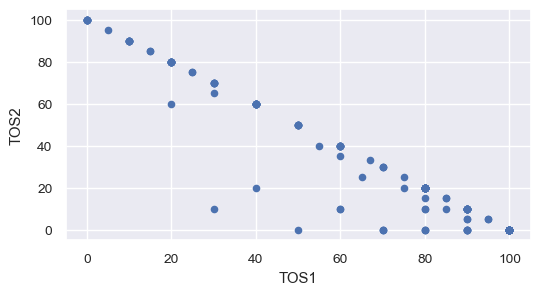

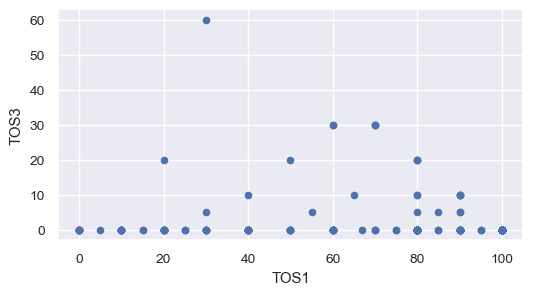

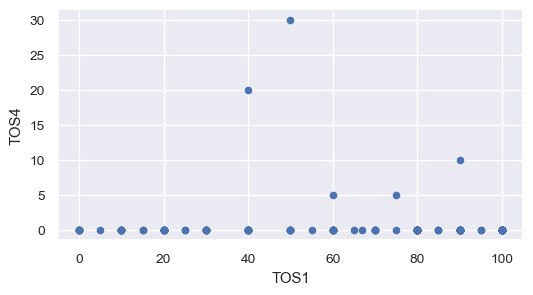

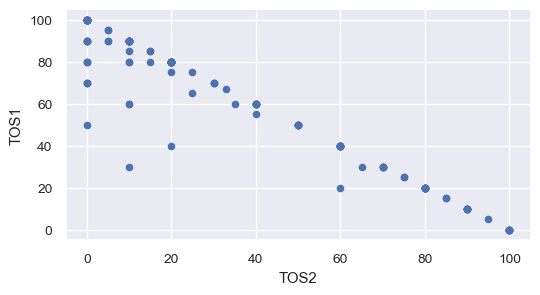

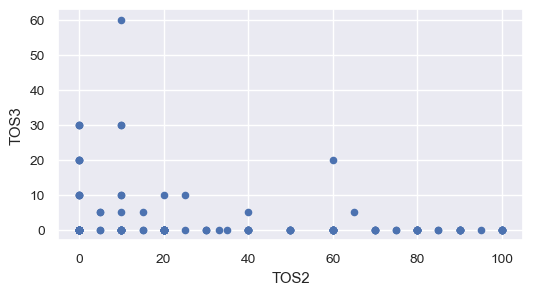

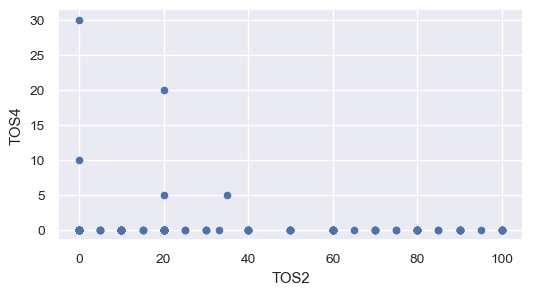

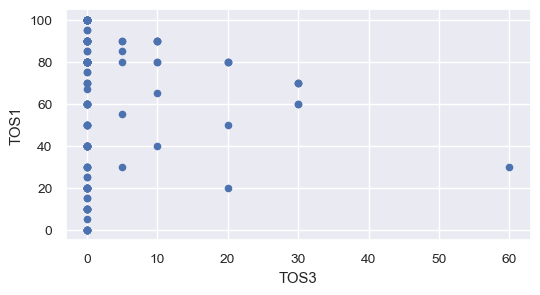

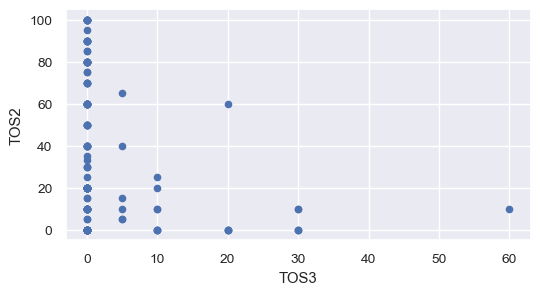

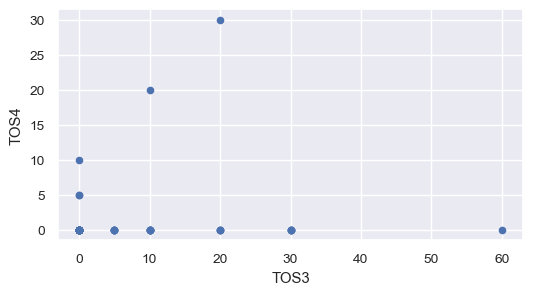

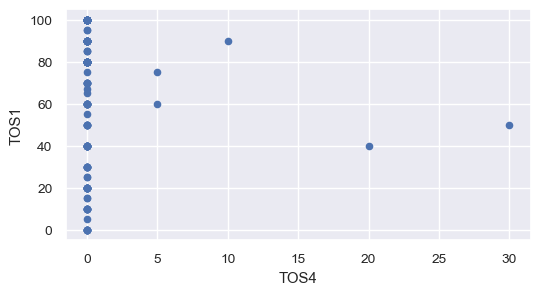

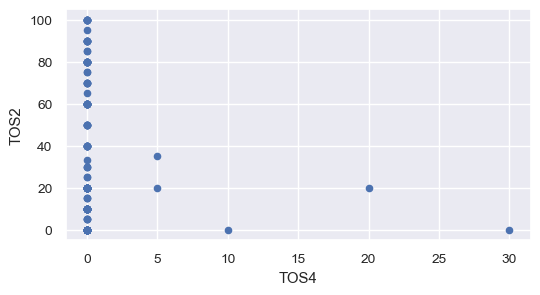

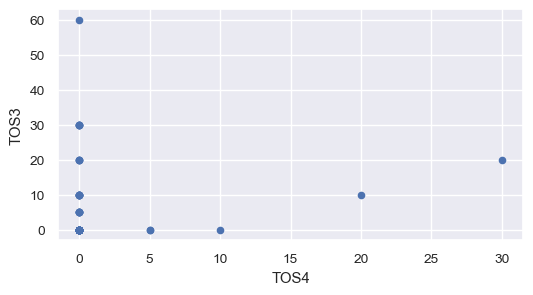

In [55]:
features = ['TOS1', 'TOS2', 'TOS3', 'TOS4']
for x, y in permutations(features, 2):
    df_gsite.plot(kind='scatter', x=x, y=y, figsize=(6,3));

### DEPTH feature comparison (nothing sticks out)

In [70]:
depth_features = [
    'DEPTHA1', 'DEPTHA2', 'DEPTHA3', 'DEPTHA4', 
    'DEPTHB1', 'DEPTHB2', 'DEPTHB3', 'DEPTHB4', 
    'DEPTHC1', 'DEPTHC2', 'DEPTHC3', 'DEPTHC4', 
    'DEPTH_MAX'
]
# too many for all comparisons
len(list(permutations(depth_features, 2))) 

156

In [82]:
# common range for plots
df_gsite[depth_features].max().max()

76.0


Comparing Depth A




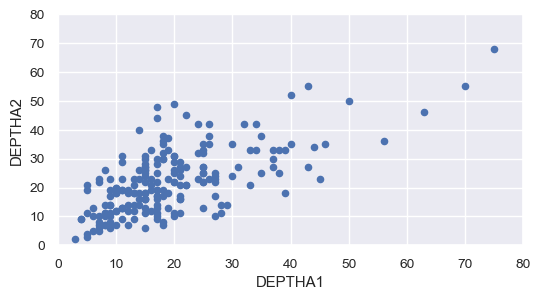

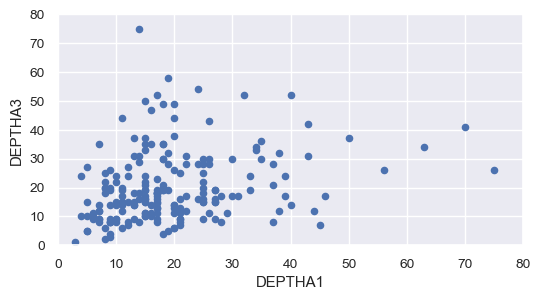

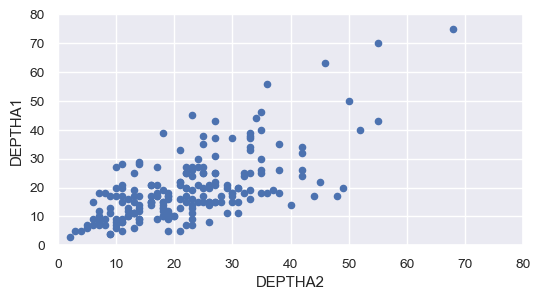

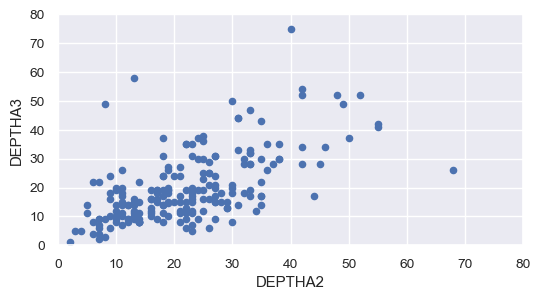

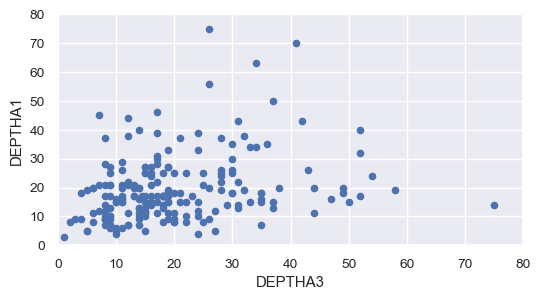

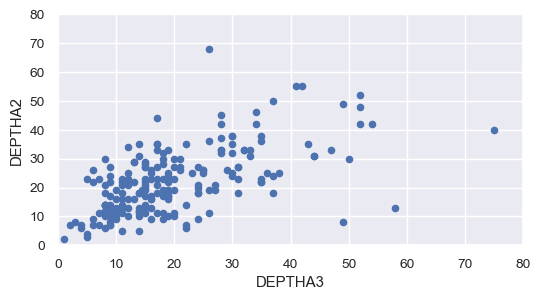


Comparing Depth B




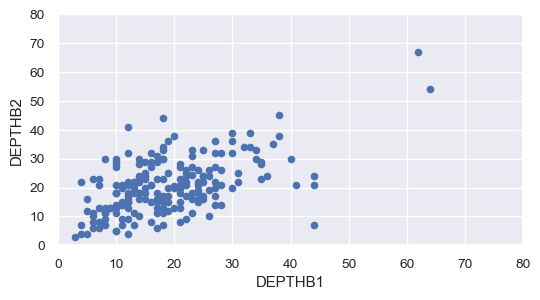

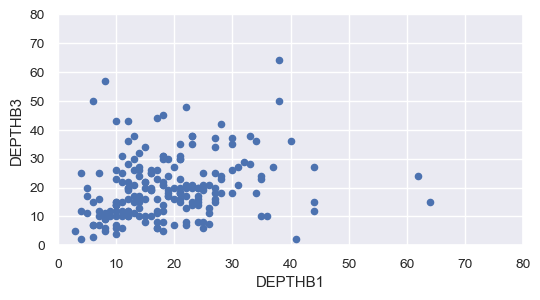

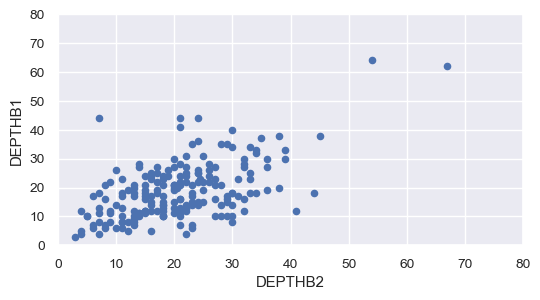

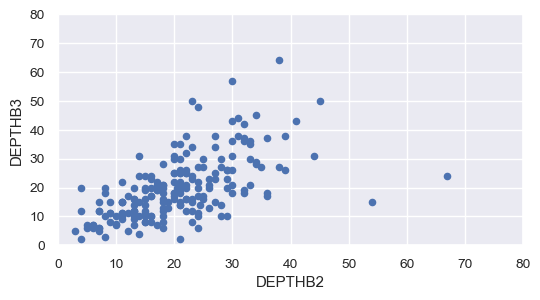

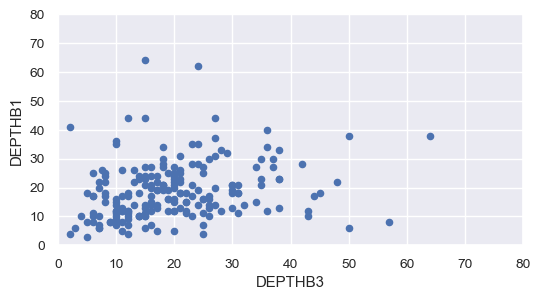

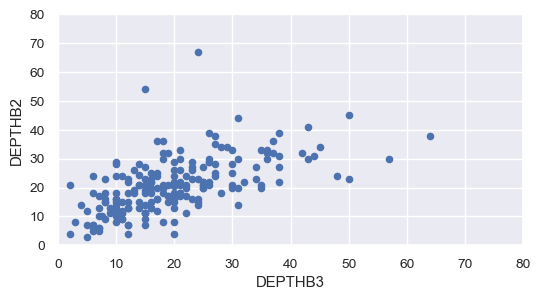


Comparing Depth C




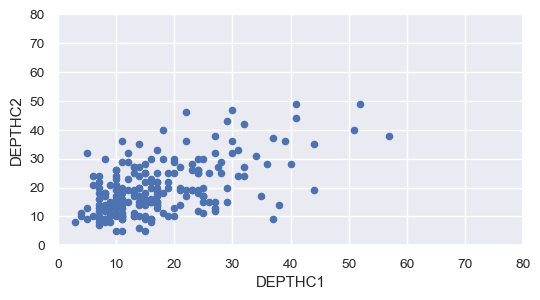

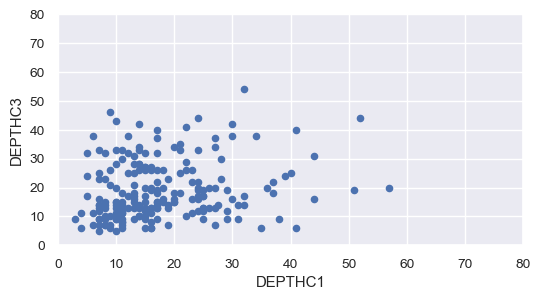

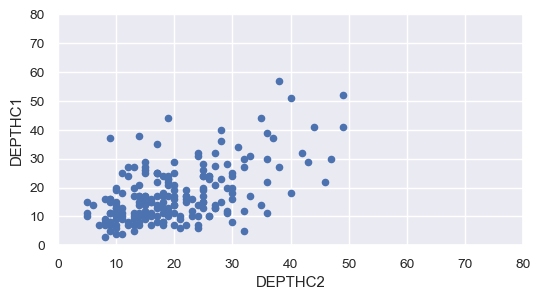

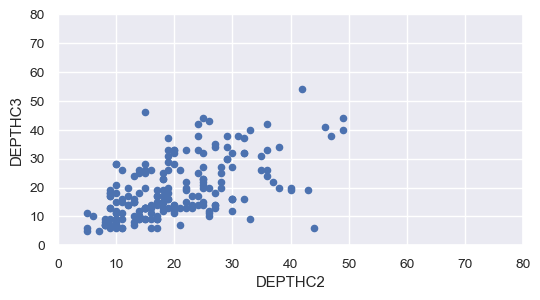

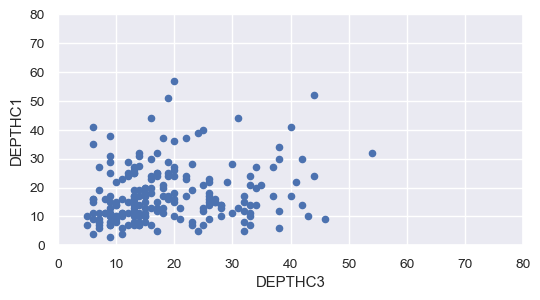

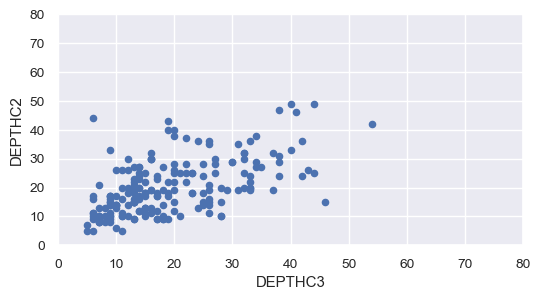

In [95]:
# depth L comparison
for L in ['A', 'B', 'C']:
    print(f'\nComparing Depth {L}\n\n')
    features = [f'DEPTH{L}1', f'DEPTH{L}2', f'DEPTH{L}3', f'DEPTH{L}4']
    for x, y in permutations(features, 2):
        if df_gsite.dropna(subset=[x, y]).shape[0]:
            df_gsite.plot(kind='scatter', x=x, y=y, figsize=(6,3), xlim=limits, ylim=limits)
            plt.show()


Comparing Depth 1




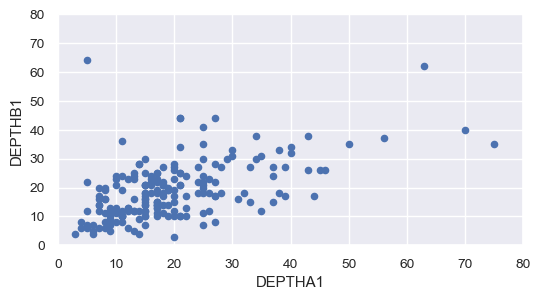

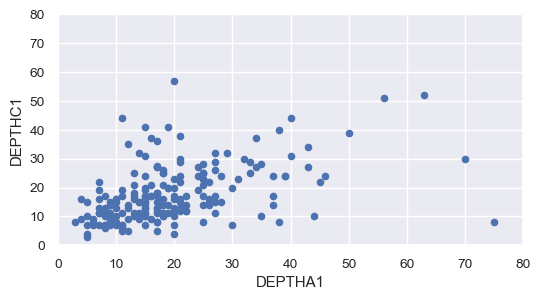

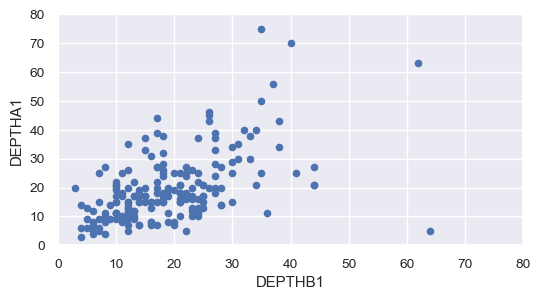

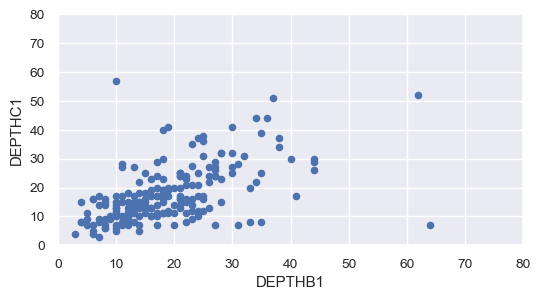

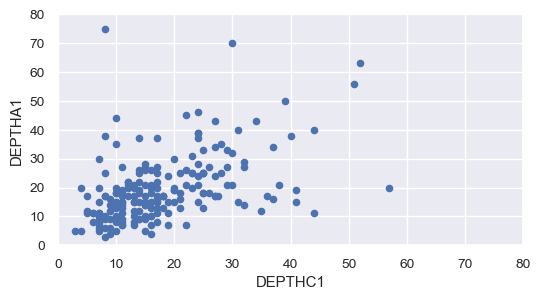

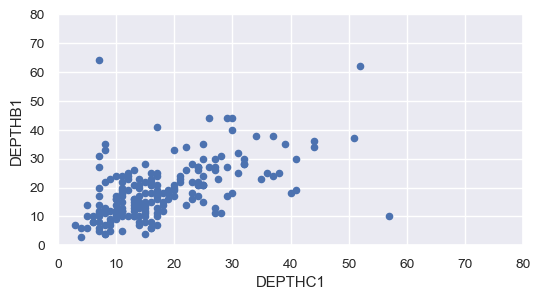


Comparing Depth 2




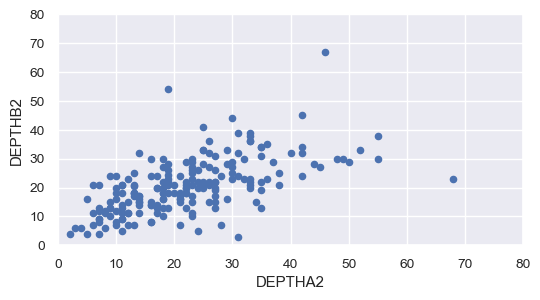

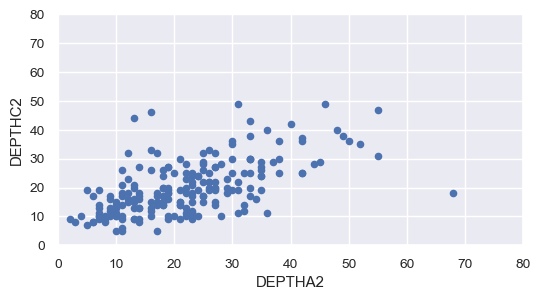

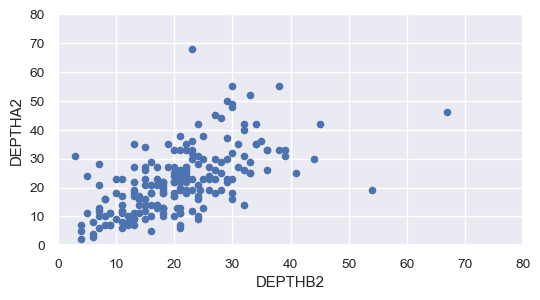

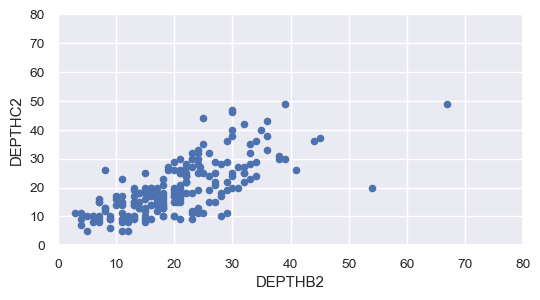

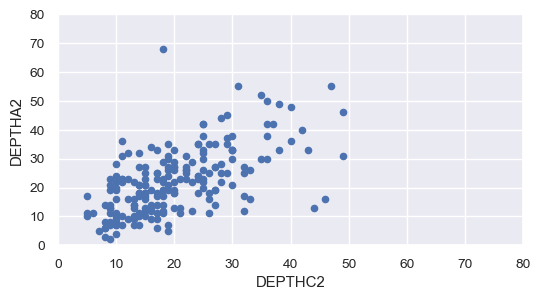

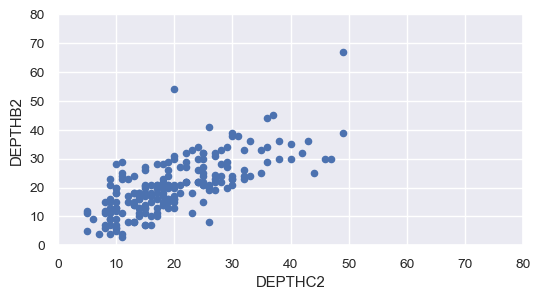


Comparing Depth 3




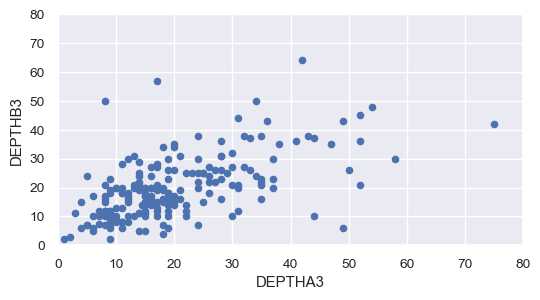

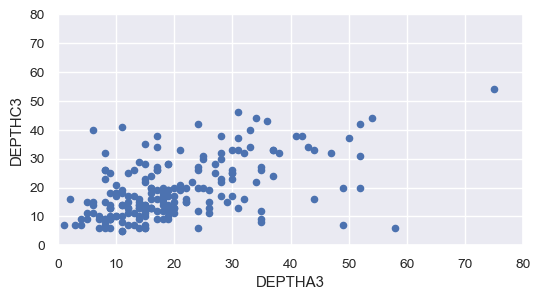

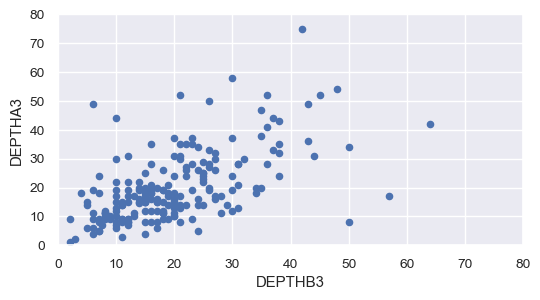

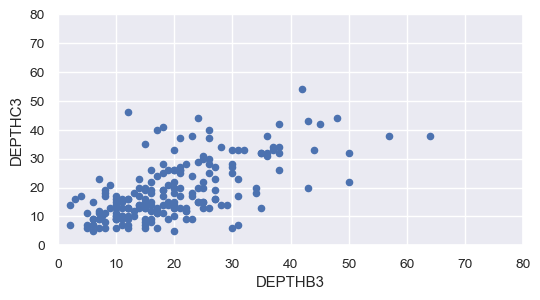

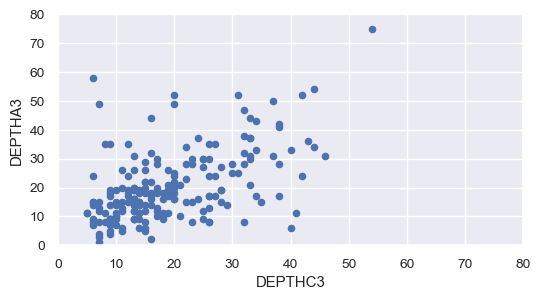

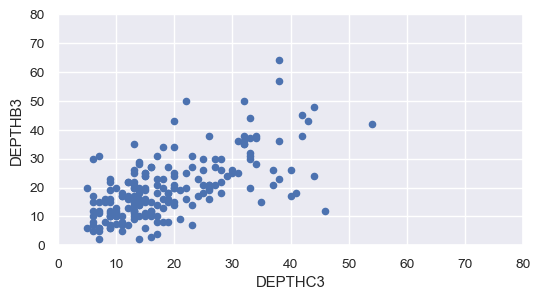

In [96]:
# depth n comparison
for n in range(1,4):
    print(f'\nComparing Depth {n}\n\n')
    features = [f'DEPTHA{n}', f'DEPTHB{n}', f'DEPTHC{n}']
    for x, y in permutations(features, 2):
        if df_gsite.dropna(subset=[x, y]).shape[0]:
            df_gsite.plot(kind='scatter', x=x, y=y, figsize=(6,3), xlim=limits, ylim=limits)
            plt.show()

### MAR SITES

In [26]:
df_msite_stats = create_stats(df_msite, ['ID'])
df_msite_stats = df_msite_stats.dropna()
df_msite = flag_outliers(df_msite, df_msite_stats)

In [27]:
print_outlier_info(df_msite)

TOS2                 
             mean  min   max count
outlier_TOS2                      
high         98.0 90.0 100.0    22
normal       15.9  0.0  80.0   162

TOS4                
             mean  min  max count
outlier_TOS4                     
high         20.0 20.0 20.0     1
normal        0.1  0.0 10.0   183

LENGTH_LEFT_BANK                
                                     mean  min  max count
outlier_LENGTH_LEFT_BANK                                 
high                                 48.6 40.0 63.1    49
low                                   5.5  5.3  5.7     3
normal                               19.2  6.1 39.0   527

LENGTH_RIGHT_BANK                
                                       mean  min  max count
outlier_LENGTH_RIGHT_BANK                                  
high                                   49.1 39.2 63.2    49
low                                     5.5  5.3  5.6     3
normal                                 19.4  6.3 38.7   527

WIDTH_LOWER                
                           mean  min  max count
outlier_WIDTH_LOWER                            
high                       31.6 19.5 49.6    59
low                         2.7  2.4  3.0     6
normal                      9.0  3.3 19.2   518

WIDTH_MIDDLE                
                             mean  min  max count
outlier_WIDTH_MIDDLE                             
high                         17.8 15.1 30.5    18
low                           2.8  2.5  3.0     2
normal                        8.2  3.3 15.0   261

WIDTH_UPPER                
                           mean  min  max count
outlier_WIDTH_UPPER                            
high                       32.6 20.5 51.2    52
low                         2.5  2.0  2.9     2
normal                      9.5  3.4 20.3   521

FULL_WETTED_WIDTH                   
                                       mean   min    max count
outlier_FULL_WETTED_WIDTH                                     
high                                  804.2 593.7 1136.8    46
low                                    52.7  46.1   56.2     3
normal                                210.2  56.3  585.0   466

DEPTHA1                 
                   mean  min   max count
outlier_DEPTHA1                         
high               64.5 48.8 114.3    26
low                 1.5  0.0   3.0     2
normal             22.0  5.0  45.7   343

DEPTHA2                
                   mean  min  max count
outlier_DEPTHA2                        
high               52.3 48.8 62.5    11
low                 3.0  0.0  6.1     2
normal             23.9  7.0 44.2   241

DEPTHA3                
                   mean  min  max count
outlier_DEPTHA3                        
high               50.1 47.2 54.0     3
low                 0.2  0.0  0.5     2
normal             14.4  0.6 45.0   248

DEPTHB1                 
                   mean  min   max count
outlier_DEPTHB1                         
high               75.0 49.4 152.4    32
low                 2.0  0.0   3.0     3
normal             22.1  5.0  48.3   339

DEPTHB2                
                   mean  min  max count
outlier_DEPTHB2                        
high               53.6 45.0 78.7    15
low                 1.5  0.0  3.0     2
normal             23.3  6.0 42.7   238

DEPTHB3                 
                   mean  min   max count
outlier_DEPTHB3                         
high               58.8 45.7 106.7    10
low                 1.5  0.0   3.0     2
normal             20.5  3.0  45.0   243

DEPTHC1                 
                   mean  min   max count
outlier_DEPTHC1                         
high               60.6 48.0 114.3    18
low                 1.5  0.0   3.0     2
normal             22.4  4.0  47.2   350

DEPTHC2                
                   mean  min  max count
outlier_DEPTHC2                        
high               52.1 45.0 64.0    10
low                 3.3  0.0  5.0     4
normal             24.0  7.5 43.0   239

DEPTHC3                
                   mean  min  max count
outlier_DEPTHC3                        
high               45.7 38.0 71.6    18
low                 2.3  0.0  3.0     4
normal             19.1  5.0 37.0   231

DEPTH_MAX                
                       mean  min  max count
outlier_DEPTH_MAX                          
high                   63.4 53.0 70.0     5
low                    16.1 13.0 19.0     6
normal                 35.3 19.5 50.0   122

AIR_TEMPERATURE                
                                   mean  min  max count
outlier_AIR_TEMPERATURE                                
high                               29.4 28.9 30.0     2
low                                11.1 10.2 12.0     2
normal                             20.4 13.3 27.8    72

WATER_TEMPERATURE_ARRIVAL                
                                                       mean  min  max count
outlier_WATER_TEMPERATURE_ARRIVAL                                          
high                                                   22.5 21.5 24.2     8
low                                                     8.4  7.2  8.9     5
normal                                                 15.0  9.1 21.1   349

WATER_TEMP1                
                           mean  min  max count
outlier_WATER_TEMP1                            
high                       20.1 19.7 20.9     3
low                        10.0 10.0 10.0     1
normal                     14.1 10.7 18.5    30

WATER_PH                
                     mean  min  max count
outlier_WATER_PH                         
high                 11.9 11.9 11.9     1
normal                7.4  6.2  8.6    44

WATER_CONDUCTIVITY                  
                                         mean   min   max count
outlier_WATER_CONDUCTIVITY                                     
high                                    306.8 219.0 760.0    49
low                                      20.0  15.0  25.0     2
normal                                   90.2  40.0 212.6   298

WATER_CONDUCTIVITY_RESOLUTION            \
                                                               mean  min  max   
outlier_WATER_CONDUCTIVITY_RESOLUTION                                           
high                                                           61.0 61.0 61.0   
low                                                            50.0 50.0 50.0   
normal                                                         53.8 51.0 57.0   

                                             
                                      count  
outlier_WATER_CONDUCTIVITY_RESOLUTION        
high                                      1  
low                                       1  
normal                                    4

SUB_TYPE_FINES                
                                 mean  min  max count
outlier_SUB_TYPE_FINES                               
high                             10.0 10.0 10.0     1
normal                            0.1  0.0  5.0   257

SUB_TYPE_SAND                
                               mean  min  max count
outlier_SUB_TYPE_SAND                              
high                           14.7 10.0 30.0    17
normal                          1.1  0.0  5.0   241

SUB_TYPE_GRAVEL                
                                   mean  min  max count
outlier_SUB_TYPE_GRAVEL                                
high                               23.4 17.0 50.0    30
low                                 0.0  0.0  1.0    23
normal                              8.1  2.0 15.0   205

SUB_TYPE_PEBBLE                
                                   mean  min  max count
outlier_SUB_TYPE_PEBBLE                                
high                               54.5 50.0 65.0    22
low                                 1.5  0.0  3.0     2
normal                             21.1  5.0 43.0   233

SUB_TYPE_COBBLE                
                                   mean  min  max count
outlier_SUB_TYPE_COBBLE                                
high                               79.3 75.0 90.0    10
low                                 7.1  0.0 10.0     7
normal                             41.7 15.0 70.0   241

SUB_TYPE_ROCKS                
                                 mean  min  max count
outlier_SUB_TYPE_ROCKS                               
high                             53.1 50.0 70.0     8
normal                           16.8  0.0 45.0   249

SUB_TYPE_BOULDER                
                                     mean  min  max count
outlier_SUB_TYPE_BOULDER                                 
high                                 17.6 15.0 30.0    25
normal                                2.7  0.0 10.0   232

SUB_TYPE_BEDROCK                
                                     mean  min  max count
outlier_SUB_TYPE_BEDROCK                                 
high                                 37.5 25.0 50.0     2
normal                                0.4  0.0 10.0   256

MAX_OVERHANG_L_BK               
                                       mean min  max count
outlier_MAX_OVERHANG_L_BK                                 
high                                    9.7 7.0 14.0     5
normal                                  1.5 0.0  6.0   124

MAX_OVERHANG_R_BK               
                                       mean min  max count
outlier_MAX_OVERHANG_R_BK                                 
high                                    4.6 3.0 10.0    19
normal                                  0.4 0.0  2.5   112

SWEEP0_5_TIME                   
                               mean   min    max count
outlier_SWEEP0_5_TIME                                 
high                         1198.7 954.0 1805.0    13
low                           255.5 255.0  256.0     2
normal                        538.3 279.0  929.0   256

SWEEP0_5_TEMP                
                               mean  min  max count
outlier_SWEEP0_5_TEMP                              
high                           18.2 18.2 18.2     1
low                             6.1  6.1  6.1     1
normal                         13.2  8.7 17.3    38

SWEEP1_TIME                    
                           mean    min    max count
outlier_SWEEP1_TIME                                
high                     3582.9 2580.0 7200.0    34
low                       297.5  283.0  312.0     2
normal                   1172.4  315.0 2400.0   340

SWEEP1_TEMP                
                           mean  min  max count
outlier_SWEEP1_TEMP                            
high                       22.0 21.1 22.8     4
low                         6.9  6.5  7.1     8
normal                     14.3  7.3 21.1   150

SWEEP2_TIME                    
                           mean    min    max count
outlier_SWEEP2_TIME                                
high                     3025.2 2160.0 6180.0    29
low                       309.7  258.0  350.0     6
normal                   1116.2  388.0 2130.0   339

SWEEP2_TEMP                
                           mean  min  max count
outlier_SWEEP2_TEMP                            
high                       22.8 22.8 22.8     2
low                         6.9  6.5  7.0     5
normal                     14.8  7.2 22.0   155

SWEEP3_TIME                    
                           mean    min    max count
outlier_SWEEP3_TIME                                
high                     2828.3 2100.0 4800.0    29
low                        84.0    0.0  252.0     3
normal                   1042.6  283.0 2070.0   333

SWEEP3_TEMP               
                           mean min  max count
outlier_SWEEP3_TEMP                           
low                         6.9 6.9  6.9     1
normal                     15.3 7.0 22.8   159

SWEEP4_TIME                    
                           mean    min    max count
outlier_SWEEP4_TIME                                
high                     2192.7 1740.0 4200.0    44
low                        51.5    0.0  365.0    37
normal                   1002.3  400.0 1680.0   225

SWEEP4_TEMP                
                           mean  min  max count
outlier_SWEEP4_TEMP                            
high                       23.0 23.0 23.0     1
low                         7.2  7.0  7.6     5
normal                     16.0  7.9 22.8   150

SWEEP5_TIME                    
                           mean    min    max count
outlier_SWEEP5_TIME                                
high                     2670.0 1860.0 3600.0     8
low                         0.0    0.0    0.0    52
normal                   1149.6  524.0 1800.0   182

SWEEP5_TEMP                
                           mean  min  max count
outlier_SWEEP5_TEMP                            
high                       23.3 23.3 23.3     1
low                         7.5  7.3  7.8     2
normal                     16.4  8.0 23.1   143

SWEEP6_TIME                    
                           mean    min    max count
outlier_SWEEP6_TIME                                
high                     1800.0 1800.0 1800.0    16
normal                    772.5    0.0 1500.0   151

SWEEP6_TEMP                
                           mean  min  max count
outlier_SWEEP6_TEMP                            
high                       24.0 24.0 24.0     1
low                         8.0  8.0  8.0     1
normal                     16.6  8.3 23.3   116

ELECTROFISHER_CURRENT                 
                                               mean  min   max count
outlier_ELECTROFISHER_CURRENT                                       
high                                          148.1 46.2 250.0     2
low                                             0.8  0.2   2.6    96
normal                                          3.5  3.5   3.5     1

ELECTROFISHER_VOLTAGE                  
                                               mean   min   max count
outlier_ELECTROFISHER_VOLTAGE                                        
high                                          489.5 450.0 600.0    20
low                                           103.4  10.0 140.0    16
normal                                        294.1 150.0 435.0   341

### TOS

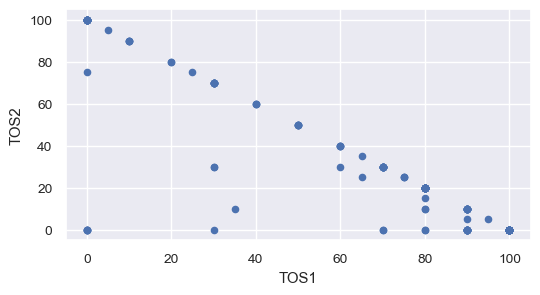

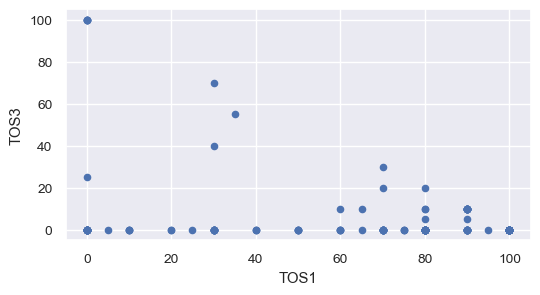

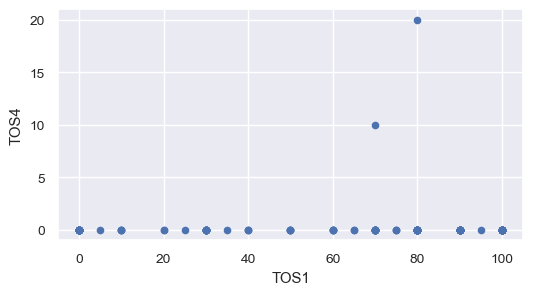

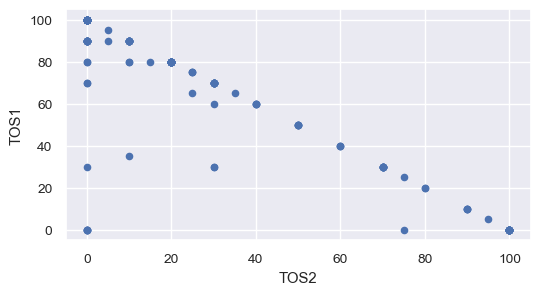

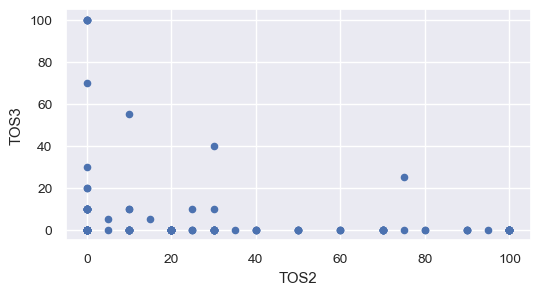

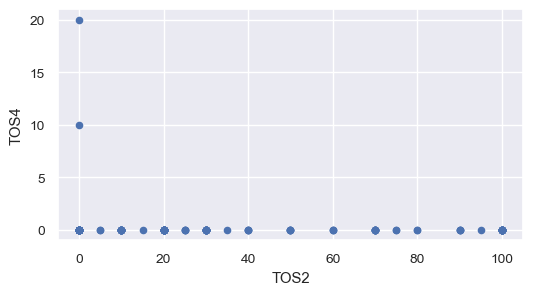

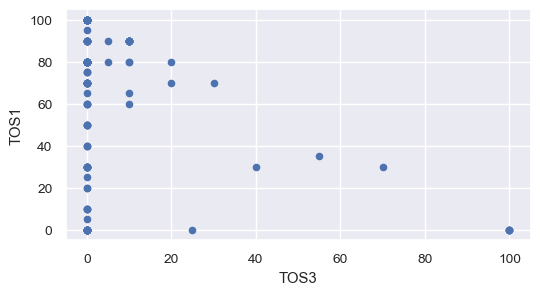

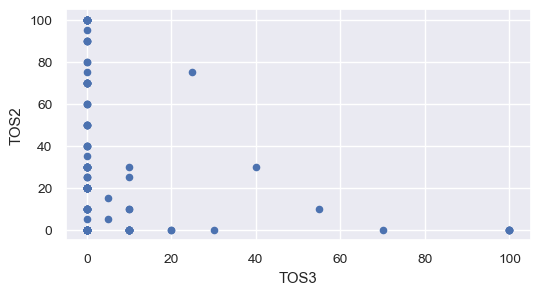

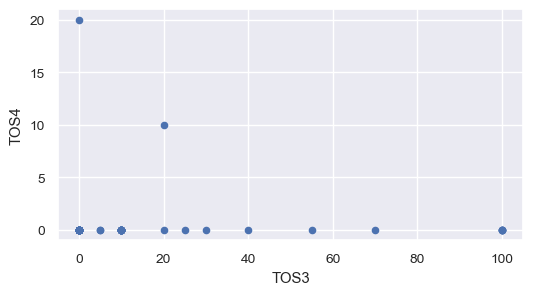

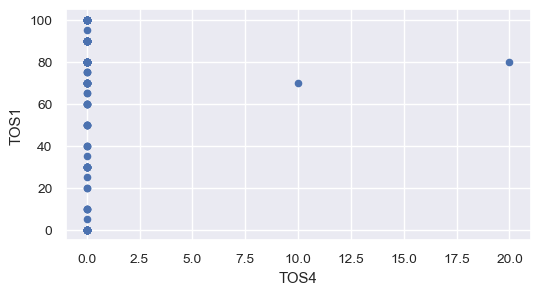

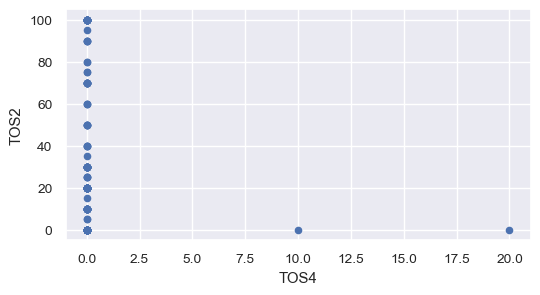

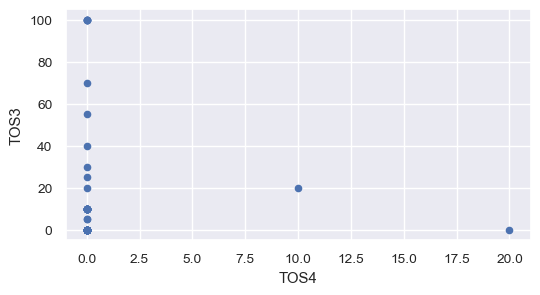

In [113]:
features = ['TOS1', 'TOS2', 'TOS3', 'TOS4']
for x, y in permutations(features, 2):
    df_msite.plot(kind='scatter', x=x, y=y, figsize=(6,3));

### comparing depths
* there are some zeros that may not make sense - we should investigate in detail
* some outliers look sort of odd (beyond 100m depth) - investigate in detail

In [161]:
# A3 looks a bit wonkey
df_msite[[x for x in df_msite.columns if 'DEPTH' in str(x) and len(x)==7]].describe(percentiles=[0.01, 0.05, .1, .25]).dropna(axis=1).T.sort_values('mean')

,count,mean,std,min,1%,5%,10%,25%,50%,max
DEPTHA3,253.0,14.7,12.6,0.0,0.6,0.9,1.2,2.7,12.0,54.0
DEPTHC3,253.0,20.8,10.7,0.0,3.0,6.1,9.1,14.0,19.0,71.6
DEPTHB3,255.0,21.8,12.5,0.0,3.0,6.1,9.0,12.2,21.0,106.7
DEPTHC1,370.0,24.1,13.5,0.0,6.0,8.0,9.1,15.0,22.4,114.3
DEPTHC2,253.0,24.7,10.3,0.0,5.0,9.1,12.0,18.0,24.0,64.0
DEPTHA1,371.0,24.9,15.1,0.0,6.0,8.0,10.0,15.2,22.0,114.3
DEPTHB2,255.0,24.9,11.4,0.0,6.1,9.1,11.0,17.2,24.0,78.7
DEPTHA2,254.0,25.0,11.0,0.0,7.5,9.2,11.0,17.0,24.0,62.5
DEPTHB1,374.0,26.5,20.0,0.0,5.0,6.4,9.1,15.2,22.9,152.4


In [102]:
df_msite[[x for x in df_msite.columns if 'DEPTH' in str(x) and len(x)==7]].max().max()

152.4

In [103]:
df_msite[[x for x in df_msite.columns if 'DEPTH' in str(x) and len(x)==7]].min().min()

0.0


Comparing Depth A




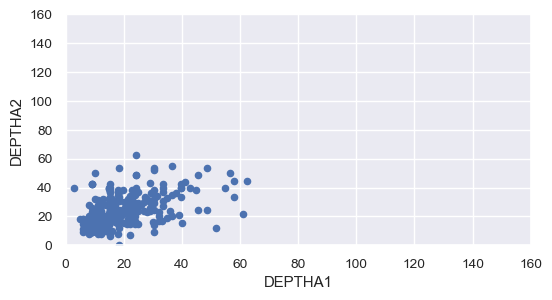

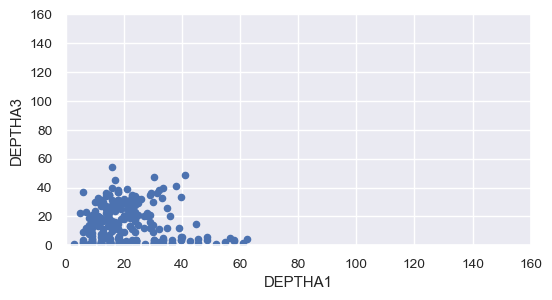

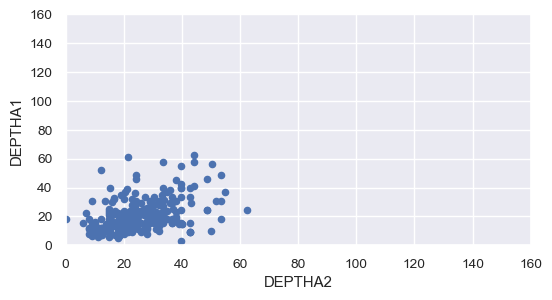

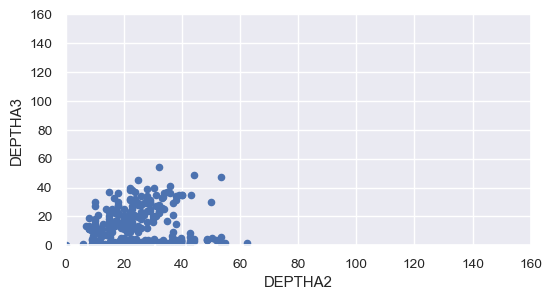

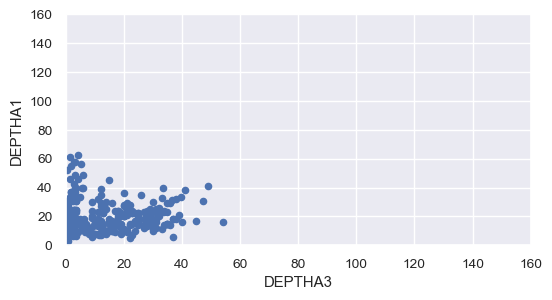

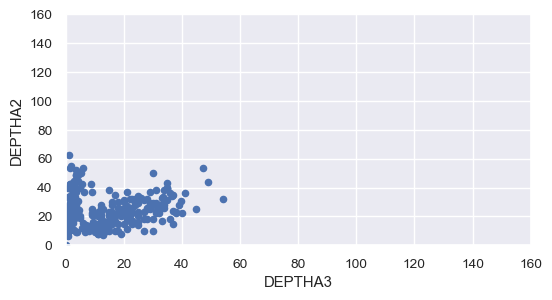


Comparing Depth B




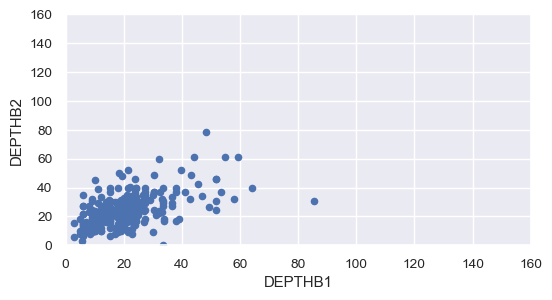

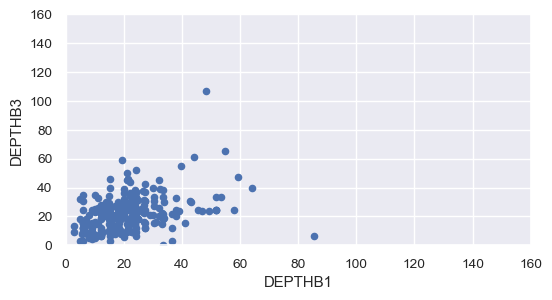

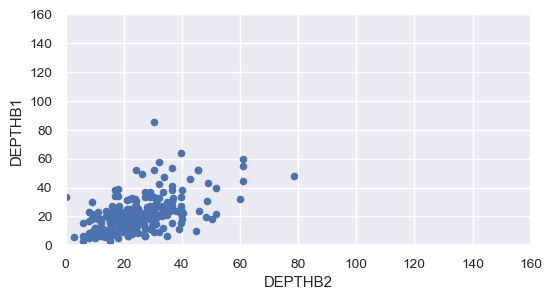

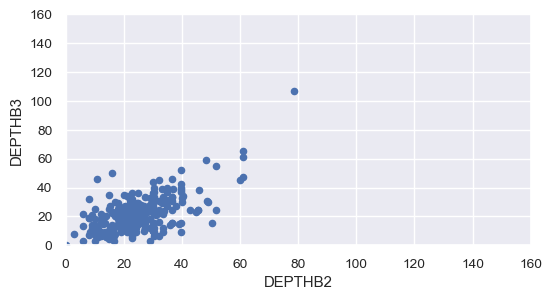

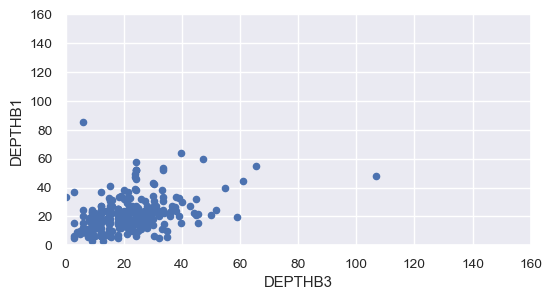

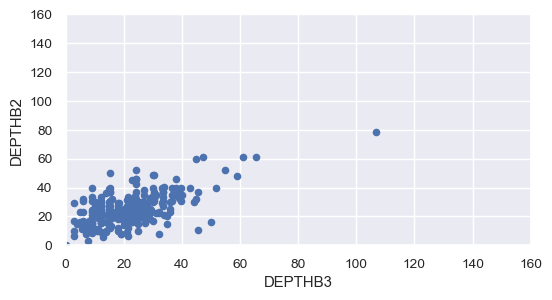


Comparing Depth C




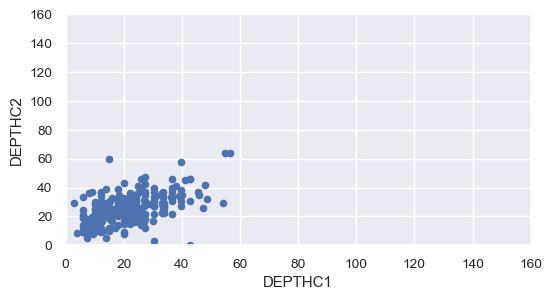

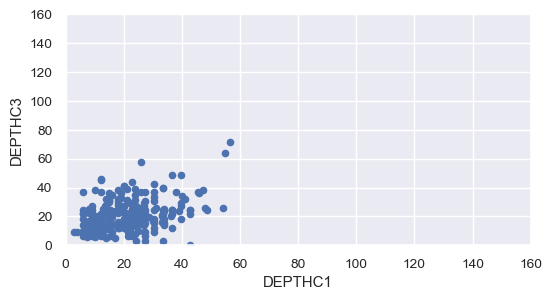

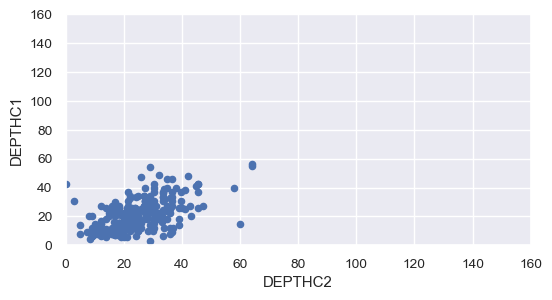

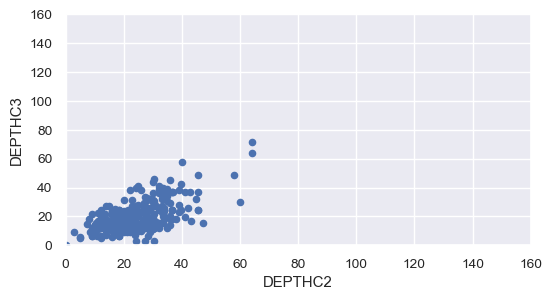

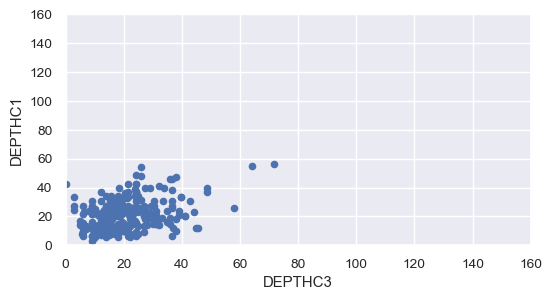

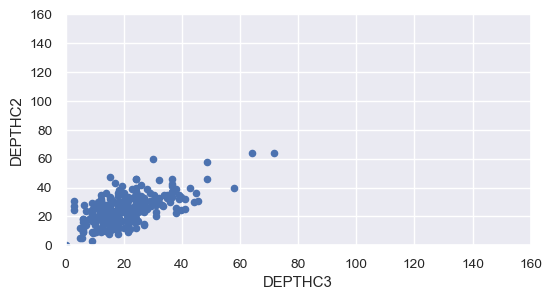

In [111]:
# depth L comparison
limits=(0,160)
for L in ['A', 'B', 'C']:
    print(f'\nComparing Depth {L}\n\n')
    features = [f'DEPTH{L}1', f'DEPTH{L}2', f'DEPTH{L}3', f'DEPTH{L}4']
    for x, y in permutations(features, 2):
        if df_msite.dropna(subset=[x, y]).shape[0]:
            df_msite.plot(kind='scatter', x=x, y=y, figsize=(6,3), xlim=limits, ylim=limits)
            plt.show()


Comparing Depth 1




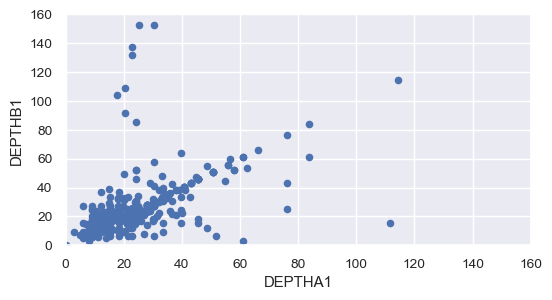

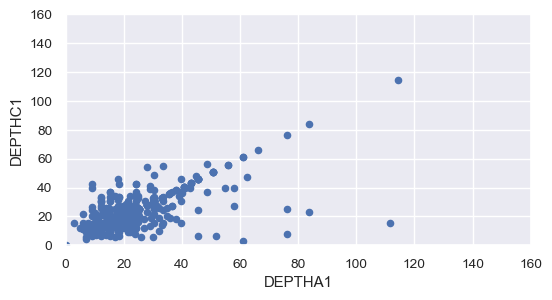

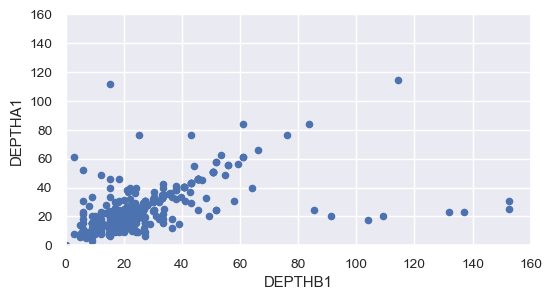

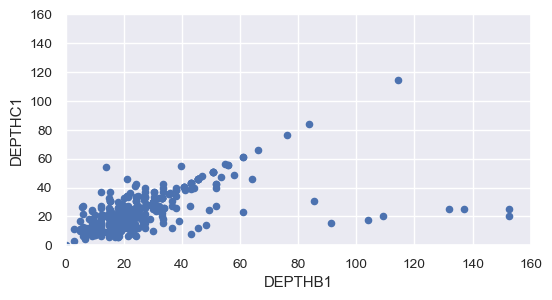

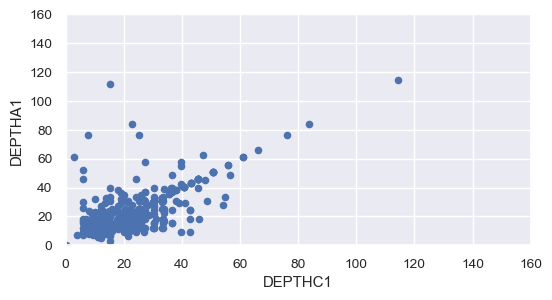

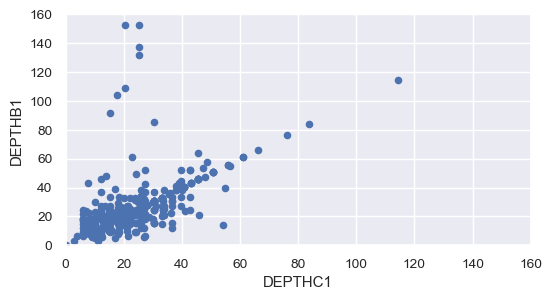


Comparing Depth 2




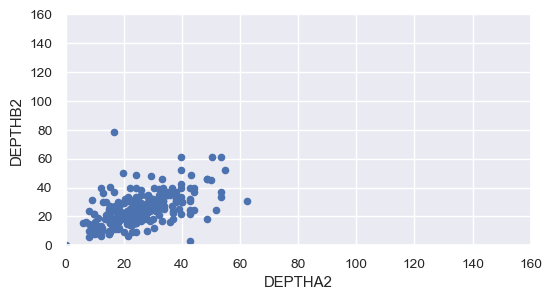

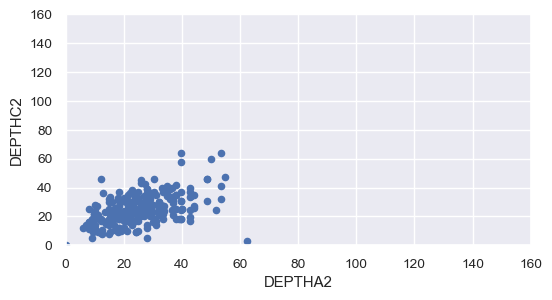

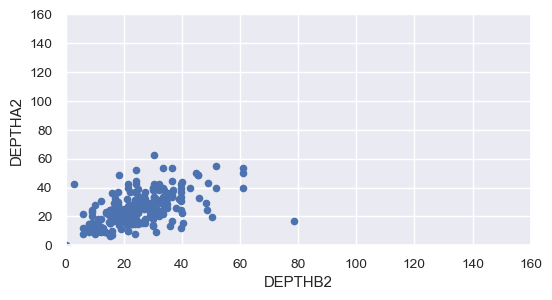

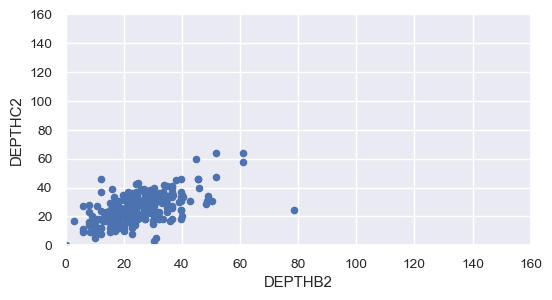

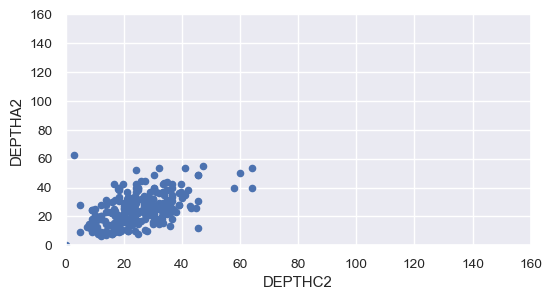

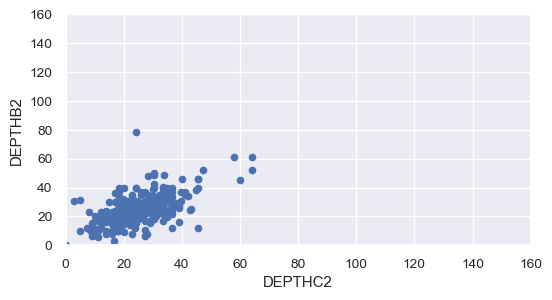


Comparing Depth 3




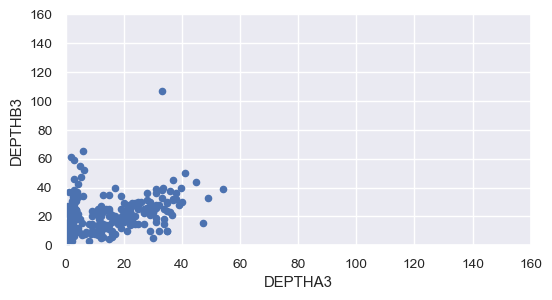

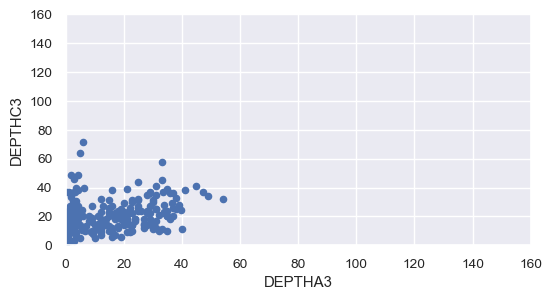

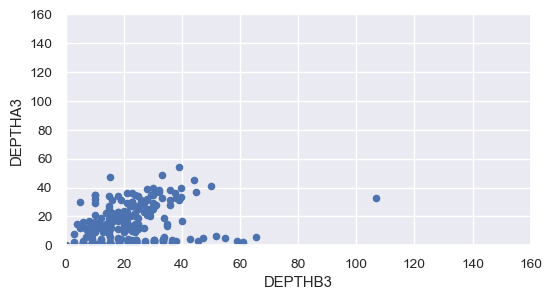

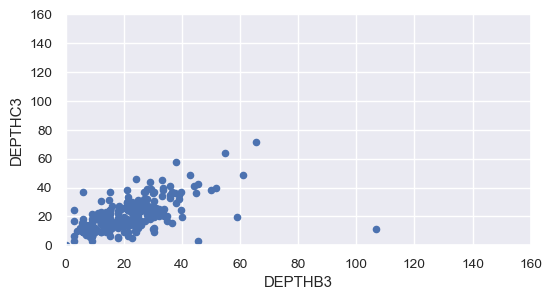

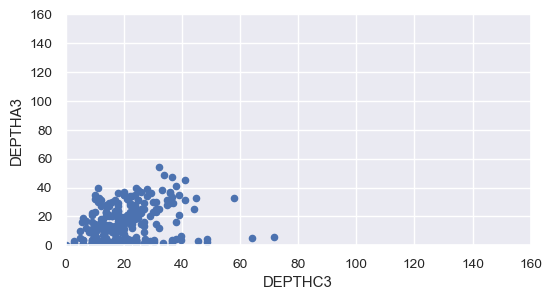

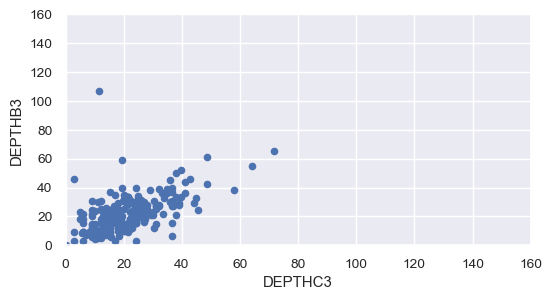

In [112]:
# depth n comparison
for n in range(1,4):
    print(f'\nComparing Depth {n}\n\n')
    features = [f'DEPTHA{n}', f'DEPTHB{n}', f'DEPTHC{n}']
    for x, y in permutations(features, 2):
        if df_msite.dropna(subset=[x, y]).shape[0]:
            df_msite.plot(kind='scatter', x=x, y=y, figsize=(6,3), xlim=limits, ylim=limits)
            plt.show()

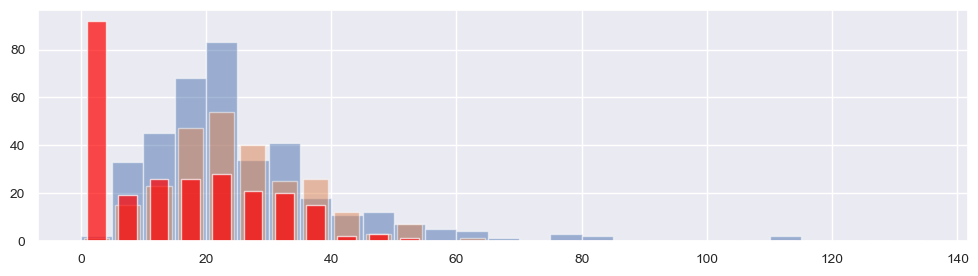

In [141]:
# let's see what's going on with all of the 0s in A3
plt.figure(figsize=(12,3))
binwidth = 5
bins=[x for x in range(0, 140, binwidth)]
df_msite.DEPTHA1.hist(figsize=figsize, bins=bins, alpha=0.5)
df_msite.DEPTHA2.hist(figsize=figsize, bins=bins, alpha=0.5, rwidth=0.8)
df_msite.DEPTHA3.hist(figsize=figsize, bins=bins, alpha=0.7, rwidth=0.6, color='red')
plt.show()   

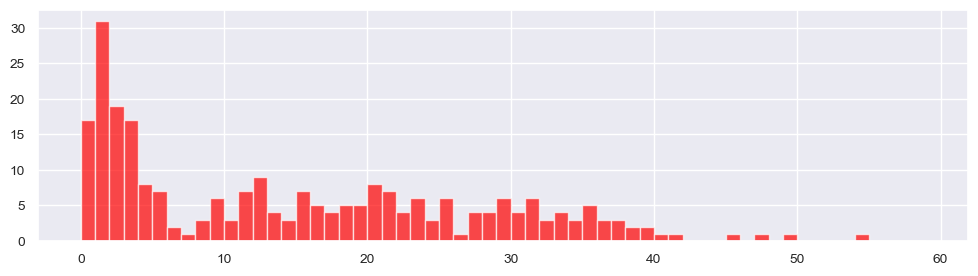

In [155]:
# A3 is definitely acting interestingly
# it's not all zeros, there are a lot of depths less than 5
bins=[x for x in range(0, 60, 1)]
df_msite.DEPTHA3.hist(figsize=figsize, bins=bins, alpha=0.7, color='red')
plt.show()

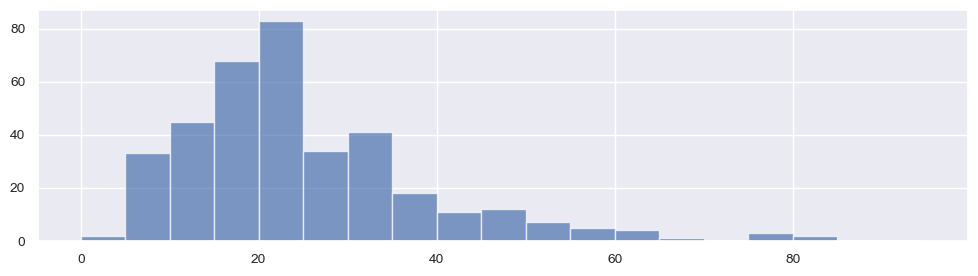

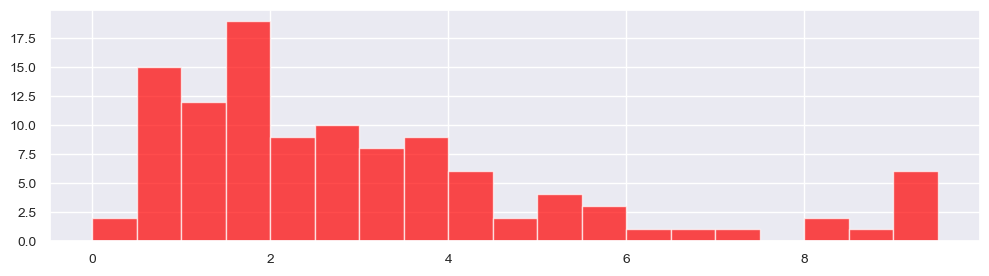

In [160]:
# try comparing to an off by 10x error
# it could be, 
binwidth=5
bins=[x for x in range(0, 100, binwidth)]
df_msite.DEPTHA1.hist(figsize=figsize, bins=bins, alpha=0.7)
plt.show()
bins=[x/10 for x in range(0, 100, binwidth)]
df_msite.DEPTHA3.hist(figsize=figsize, bins=bins, alpha=0.7, color='red')
plt.show()

In [163]:
# filter by off by 10?
df_msite[(df_msite.DEPTHA3<df_msite.DEPTHA1/10)|(df_msite.DEPTHA3<df_msite.DEPTHA2/10)].DEPTHA3.describe()

count   68.0
mean     1.9
std      1.1
min      0.0
25%      1.1
50%      1.5
75%      2.6
max      5.2
Name: DEPTHA3, dtype: float64

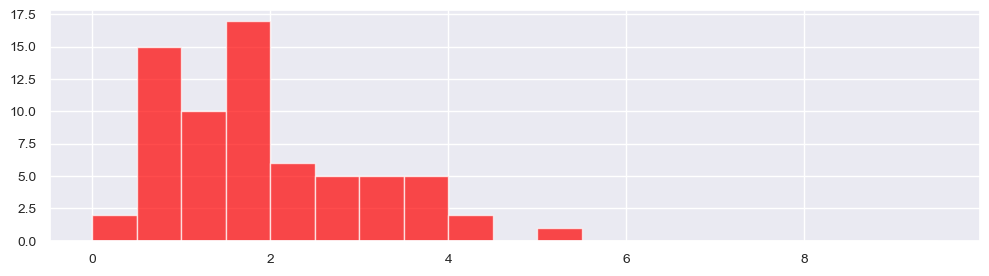

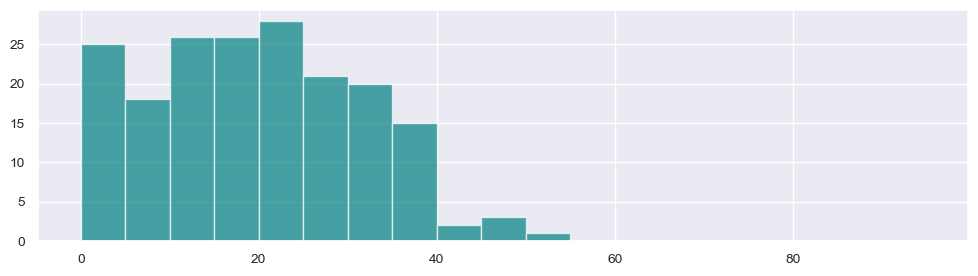

In [167]:
# that didn't work perfectly
filter_10x = (df_msite.DEPTHA3<df_msite.DEPTHA1/10) | (df_msite.DEPTHA3<df_msite.DEPTHA2/10)
bins=[x/10 for x in range(0, 100, binwidth)]
df_msite[filter_10x].DEPTHA3.hist(figsize=figsize, bins=bins, alpha=0.7, color='red')
plt.show()
bins=[x for x in range(0, 100, binwidth)]
df_msite[~filter_10x].DEPTHA3.hist(figsize=figsize, bins=bins, alpha=0.7, color='teal')
plt.show()

In [187]:
# can't use 95%, or we'll miss most of these
df_msite[df_msite.DEPTHA3<5].shape[0], df_msite[df_msite.DEPTHA3>=5].shape[0]

(92, 161)

In [189]:
# about 15% are below 5
df_msite[df_msite.DEPTHA3<5].shape[0] / df_msite.shape[0]

0.14910858995137763

In [190]:
(df_msite[df_msite.DEPTHA3<5].DEPTHA3 / df_msite[df_msite.DEPTHA3<5].DEPTHA1).describe(percentiles=[.025, .975])

count   92.00
mean     0.13
std      0.11
min      0.00
2.5%     0.02
50%      0.10
97.5%    0.43
max      0.60
dtype: float64



RATIO OF DEPTHA1 AND/OR DEPTHA2 TO DEPTHA3: 2


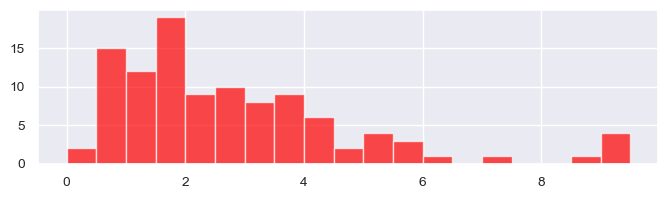

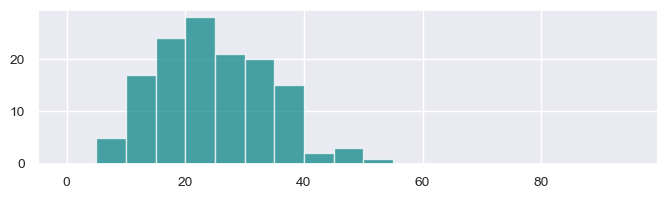



RATIO OF DEPTHA1 AND/OR DEPTHA2 TO DEPTHA3: 3


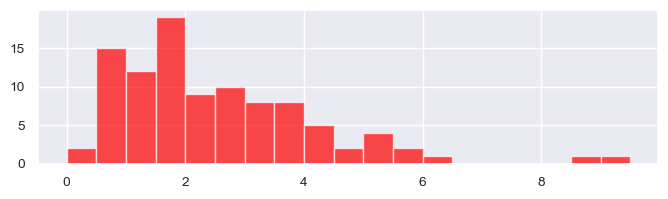

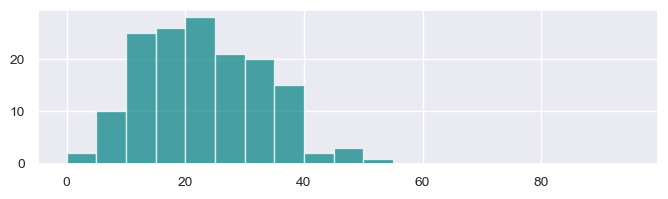



RATIO OF DEPTHA1 AND/OR DEPTHA2 TO DEPTHA3: 5


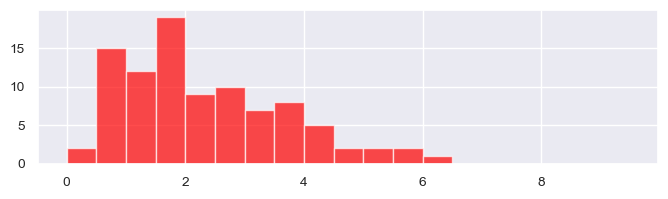

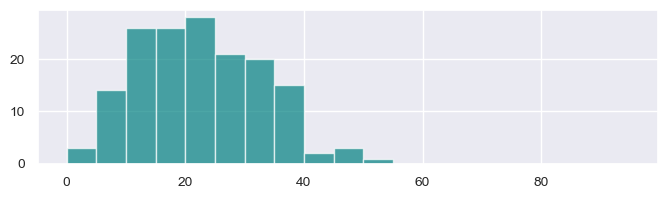



RATIO OF DEPTHA1 AND/OR DEPTHA2 TO DEPTHA3: 7


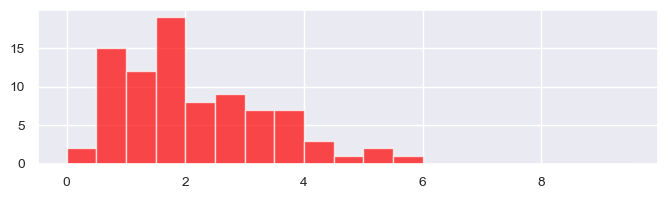

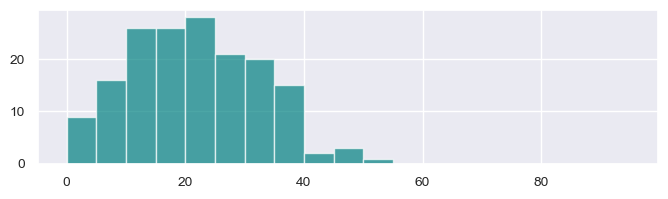



RATIO OF DEPTHA1 AND/OR DEPTHA2 TO DEPTHA3: 10


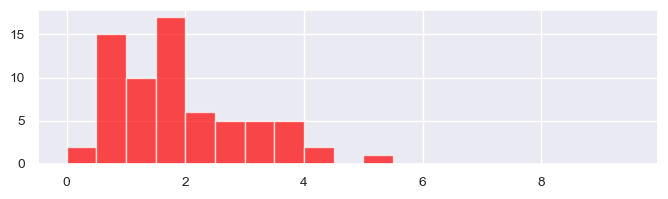

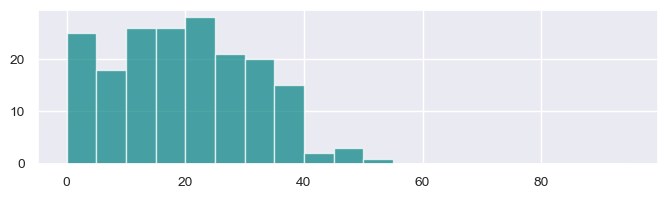



RATIO OF DEPTHA1 AND/OR DEPTHA2 TO DEPTHA3: 20


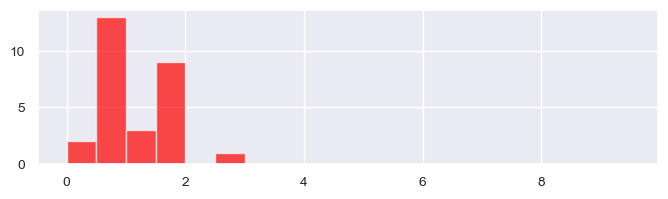

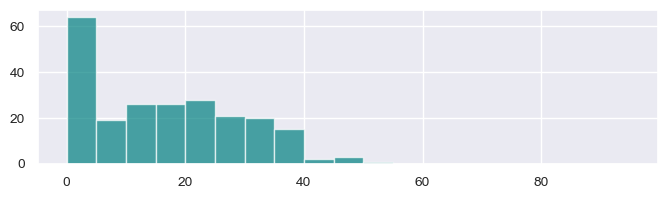

In [200]:
# loop through filter ratios until they are the same distribution
# looks like 3 or 5 maybe... not sure how to verify this. 5 has less over 8, probably better.
figsize=(8, 2)
for ratio in [2, 3, 5, 7, 10, 20]:
    print(f'\n\nRATIO OF DEPTHA1 AND/OR DEPTHA2 TO DEPTHA3: {ratio}')
    filter = (df_msite.DEPTHA3<df_msite.DEPTHA1/ratio) | (df_msite.DEPTHA3<df_msite.DEPTHA2/ratio)
    bins=[x/10 for x in range(0, 100, binwidth)]
    df_msite[filter].DEPTHA3.hist(figsize=figsize, bins=bins, alpha=0.7, color='red')
    plt.show()
    bins=[x for x in range(0, 100, binwidth)]
    df_msite[~filter].DEPTHA3.hist(figsize=figsize, bins=bins, alpha=0.7, color='teal')
    plt.show()

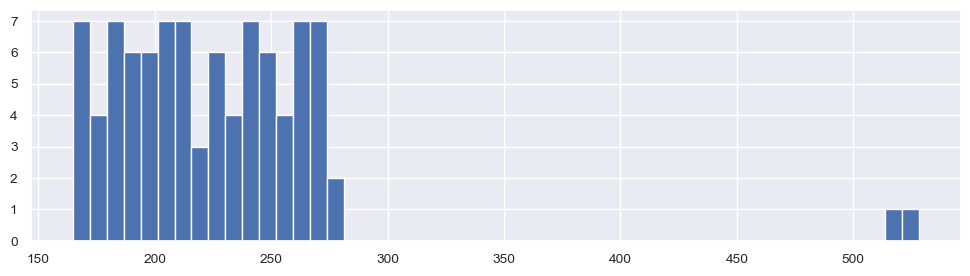

In [223]:
# were all of the wonkey measurements taken/inputted together?
df_msite[df_msite.DEPTHA3<5].rename_axis('idx').reset_index().idx.hist(figsize=(12,3), bins=50);

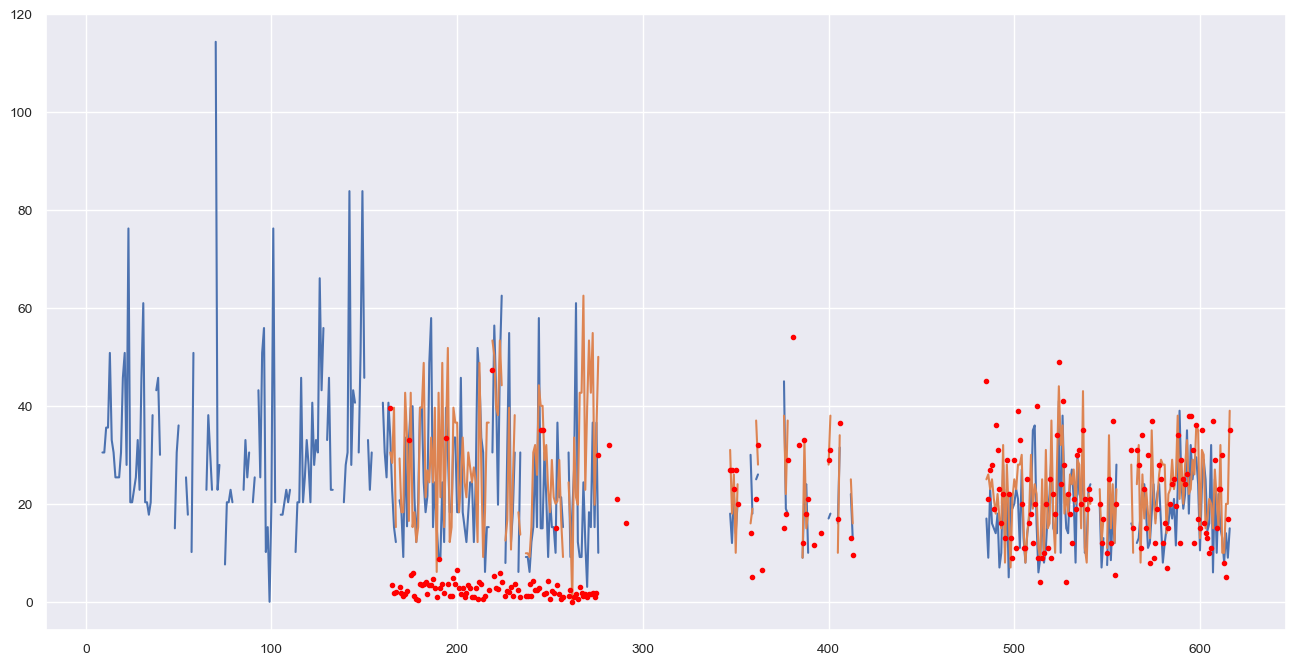

In [243]:
plt.figure(figsize=(16,8))
df_msite.DEPTHA1.plot()
df_msite.DEPTHA2.plot()
df_msite.DEPTHA3.plot(color='red', marker='.', linestyle='')
plt.show()

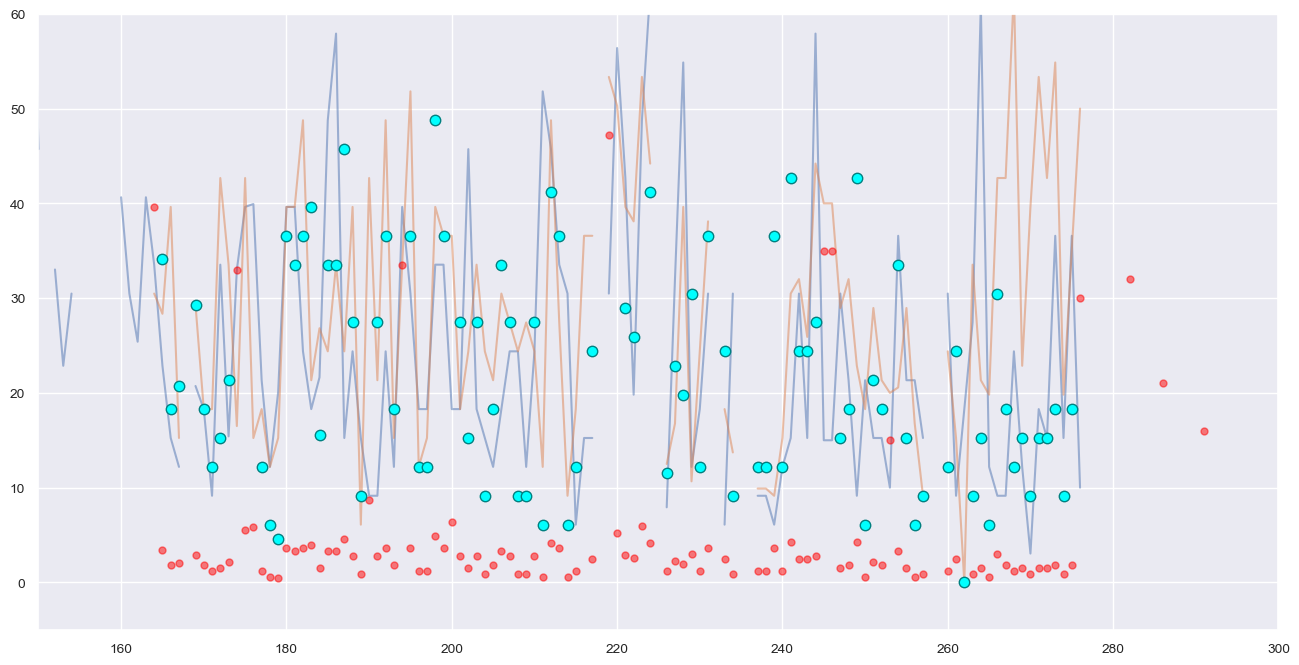

In [259]:
plt.figure(figsize=(16,8))
plt.xlim(150, 300)
plt.ylim(-5, 60)
df_msite.DEPTHA1.plot(alpha=0.5)
df_msite.DEPTHA2.plot(alpha=0.5)
df_msite.DEPTHA3.plot(color='red', marker='.', linestyle='', markersize=10, alpha=0.5)
(df_msite[df_msite.DEPTHA3<5].DEPTHA3*10).plot(color='cyan', marker='.', linestyle='', markersize=15, markeredgecolor='teal')
plt.show()